# CREDIT SCORE ESTIMATION

## Project Goal:

The goal of this project is to build a machine learning model that can predict the credit worthiness of customers. The model can be used by banks and other financial institutions to assess the risk of lending money to customers. The project will involve data preprocessing, test for multicollinearity, model training, and evaluation. By leveraging historical credit data, the project will provide insights into creditworthiness and assist in risk assessment for lenders.

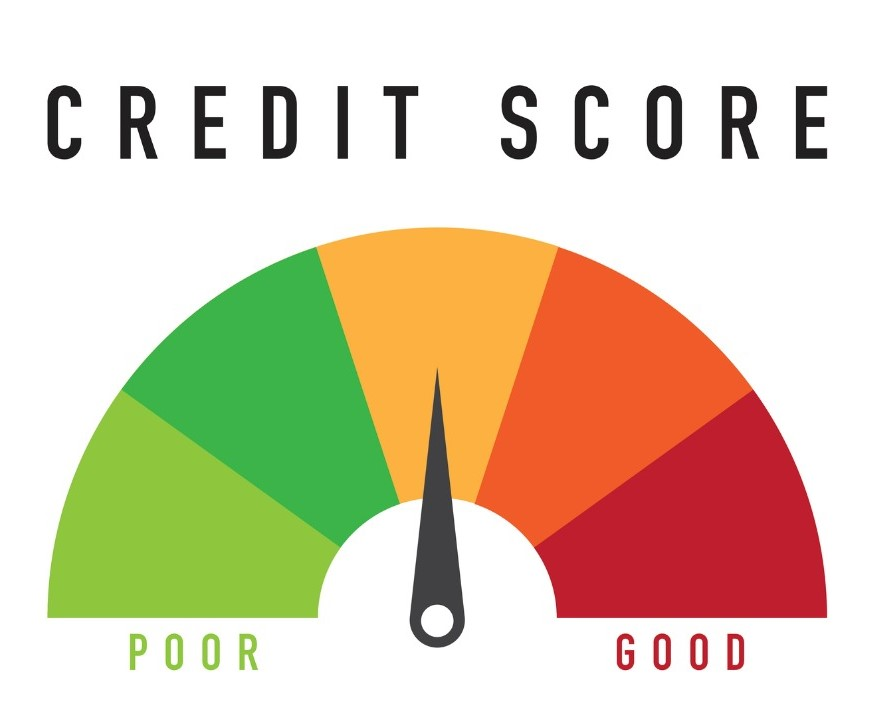

In [ ]:
display_image(credsco)

### _Importing Liabraries_

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.utils import resample
from itertools import combinations

#for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

#for model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for displaying images
from IPython.display import display, Image
import matplotlib.image as mpimg

#Other
import warnings
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as st


In [ ]:
#To display images
def display_image(image_path):
    display(Image(filename=image_path))

credsco="C:\PROJECTS\ML\CREDIT SCORE\Credit-Score2.jpg"
feat ='C:/PROJECTS/ML/CREDIT SCORE/feature ML.jpg'

### _loading and exploring data_

In [ ]:
df_train = pd.read_csv("/content/credit_score.csv")
display(df_train)

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      19114.12            1824.843333                  3   
1      Scientist      19114.12                    NaN                  3   
2      Scientist      19114.12                    NaN                  3   
3      Scientist      19114.12                    NaN                  3   
4      Scientist      19114.12            1824.843333                  3   
...          ...           ...                    ...                ...   
99995   Mechanic      39628.99            3359.415833                  4   
99996   Mechanic      39628.99            3359.415833                  4   
99997   Mechanic      39628.99            3359.415833                  4   
99998   Mechanic      39628.99            3359.415833                  4   
99999   Mechanic     39628.99_            3359.415833                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    4              3           4   
1                    4              3           4   
2                    4              3           4   
3                    4              3           4   
4                    4              3           4   
...                ...            ...         ...   
99995                6              7           2   
99996                6              7           2   
99997                6           5729           2   
99998                6              7           2   
99999                6              7           2   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                          7                11.27                   4.0   
1                        NaN                11.27                   4.0   
2                          7                    _                   4.0   
3                          4                 6.27                   4.0   
4                        NaN                11.27                   4.0   
...                      ...                  ...                   ...   
99995                      7                 11.5                   3.0   


In [ ]:
df_test = pd.read_csv("/content/credit_score.csv")
display(df_test)

ID Customer_ID      Month             Name   Age          SSN  \
0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265   
1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
3       0x160d   CUS_0xd40   December    Aaron Maashoh   24_  821-00-0265   
4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839   
...        ...         ...        ...              ...   ...          ...   
49995  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942   
49996  0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   
49997  0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   
49998  0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   
49999  0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      19114.12            1824.843333                  3   
1      Scientist      19114.12            1824.843333                  3   
2      Scientist      19114.12            1824.843333                  3   
3      Scientist      19114.12                    NaN                  3   
4        _______      34847.84            3037.986667                  2   
...          ...           ...                    ...                ...   
49995  Architect      20002.88            1929.906667                 10   
49996   Mechanic      39628.99                    NaN                  4   
49997   Mechanic      39628.99            3359.415833                  4   
49998   Mechanic      39628.99                    NaN                  4   
49999   Mechanic      39628.99            3359.415833                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    4              3           4   
1                    4              3           4   
2                    4              3           4   
3                    4              3           4   
4                    4              6           1   
...                ...            ...         ...   
49995                8             29           5   
49996                6              7          2_   
49997                6              7           2   
49998                6              7          2_   
49999                6              7           2   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    4   
4                                    Credit-Builder Loan                    3   
...                                                  ...                  ...   
49995  Personal Loan, Auto Loan, Mortgage Loan, Stude...                   33   
49996                        Auto Loan, and Student Loan                   20   
49997                        Auto Loan, and Student Loan                   23   
49998                        Auto Loan, and Student Loan                   21   
49999                        Auto Loan, and Student Loan                   22   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                          7                11.27                2022.0   
1                          9                13.27                   4.0   
2                          4                12.27                   4.0   
3                          5                11.27                   4.0   
4                          1                 5.42                   5.0   
...                      ...                  ...                   ...   
49995                     25           

In [ ]:
display(
    df_train.describe(exclude=np.number).T,
    print(),
    df_test.describe(exclude=np.number).T
)

count  unique                               top  \
ID                       100000  100000                            0x1602   
Customer_ID              100000   12500                         CUS_0xd40   
Month                    100000       8                           January   
Name                      90015   10139                            Langep   
Age                      100000    1788                                38   
SSN                      100000   12501                         #F%$D@*&8   
Occupation               100000      16                           _______   
Annual_Income            100000   18940                          36585.12   
Num_of_Loan              100000     434                                 3   
Type_of_Loan              88592    6260                     Not Specified   
Num_of_Delayed_Payment    92998     749                                19   
Changed_Credit_Limit     100000    4384                                 _   
Credit_Mix               100000       4                          Standard   
Outstanding_Debt         100000   13178                           1360.45   
Credit_History_Age        90970     404            15 Years and 11 Months   
Payment_of_Min_Amount    100000       3                               Yes   
Amount_invested_monthly   95521   91049                         __10000__   
Payment_Behaviour        100000       7    Low_spent_Small_value_payments   
Monthly_Balance           98800   98792  __-333333333333333333333333333__   
Credit_Score             100000       3                          Standard   

                          freq  
ID                           1  
Customer_ID                  8  
Month                    12500  
Name                        44  
Age                       2833  
SSN                       5572  
Occupation                7062  
Annual_Income               16  
Num_of_Loan              14386  
Type_of_Loan              1408  
Num_of_Delayed_Payment    5327  
Changed_Credit_Limit      2091  
Credit_Mix               36479  
Outstanding_Debt            24  
Credit_History_Age         446  
Payment_of_Min_Amount    52326  
Amount_invested_monthly   4305  
Payment_Behaviour        25513  
Monthly_Balance              9  
Credit_Score             53174

None

count unique                               top   freq
ID                       50000  50000                            0x160a      1
Customer_ID              50000  12500                         CUS_0xd40      4
Month                    50000      4                         September  12500
Name                     44985  10139                            Stevex     22
Age                      50000    976                                39   1493
SSN                      50000  12501                         #F%$D@*&8   2828
Occupation               50000     16                           _______   3438
Annual_Income            50000  16121                         109945.32      8
Num_of_Loan              50000    263                                 2   7173
Type_of_Loan             44296   6260                     Not Specified    704
Num_of_Delayed_Payment   46502    443                                19   2622
Changed_Credit_Limit     50000   3927                                 _   1059
Credit_Mix               50000      4                          Standard  18379
Outstanding_Debt         50000  12685                           1109.03     12
Credit_History_Age       45530    399             20 Years and 1 Months    254
Payment_of_Min_Amount    50000      3                               Yes  26158
Amount_invested_monthly  47729  45450                         __10000__   2175
Payment_Behaviour        50000      7    Low_spent_Small_value_payments  12694
Monthly_Balance          49438  49433  __-333333333333333333333333333__      6

In [ ]:
#checking if all columns except credit scores to be predicted are the same in the two dataset
(df_train.columns[:-1]!=df_test.columns).sum()

0

In [ ]:
#Concatenate Test and Train Data
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(150000, 28)

In [ ]:
df

ID Customer_ID      Month            Name   Age          SSN  \
0        0x1602   CUS_0xd40    January   Aaron Maashoh    23  821-00-0265   
1        0x1603   CUS_0xd40   February   Aaron Maashoh    23  821-00-0265   
2        0x1604   CUS_0xd40      March   Aaron Maashoh  -500  821-00-0265   
3        0x1605   CUS_0xd40      April   Aaron Maashoh    23  821-00-0265   
4        0x1606   CUS_0xd40        May   Aaron Maashoh    23  821-00-0265   
...         ...         ...        ...             ...   ...          ...   
149995  0x25fe5  CUS_0x8600   December  Sarah McBridec  4975  031-35-0942   
149996  0x25fee  CUS_0x942c  September           Nicks    25  078-73-5990   
149997  0x25fef  CUS_0x942c    October           Nicks    25  078-73-5990   
149998  0x25ff0  CUS_0x942c   November           Nicks    25  078-73-5990   
149999  0x25ff1  CUS_0x942c   December           Nicks    25  078-73-5990   

       Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       Scientist      19114.12            1824.843333                  3   
1       Scientist      19114.12                    NaN                  3   
2       Scientist      19114.12                    NaN                  3   
3       Scientist      19114.12                    NaN                  3   
4       Scientist      19114.12            1824.843333                  3   
...           ...           ...                    ...                ...   
149995  Architect      20002.88            1929.906667                 10   
149996   Mechanic      39628.99                    NaN                  4   
149997   Mechanic      39628.99            3359.415833                  4   
149998   Mechanic      39628.99                    NaN                  4   
149999   Mechanic      39628.99            3359.415833                  4   

        Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                     4              3           4   
1                     4              3           4   
2                     4              3           4   
3                     4              3           4   
4                     4              3           4   
...                 ...            ...         ...   
149995                8             29           5   
149996                6              7          2_   
149997                6              7           2   
149998                6              7          2_   
149999                6              7           2   

                                             Type_of_Loan  \
0       Auto Loan, Credit-Builder Loan, Personal Loan,...   
1       Auto Loan, Credit-Builder Loan, Personal Loan,...   
2       Auto Loan, Credit-Builder Loan, Personal Loan,...   
3       Auto Loan, Credit-Builder Loan, Personal Loan,...   
4       Auto Loan, Credit-Builder Loan, Personal Loan,...   
...                                                   ...   
149995  Personal Loan, Auto Loan, Mortgage Loan, Stude...   
149996                        Auto Loan, and Student Loan   
149997                        Auto Loan, and Student Loan   
149998                        Auto Loan, and Student Loan   
149999                        Auto Loan, and Student Loan   

        Delay_from_due_date Num_of_Delayed_Payment Changed_Credit_Limit  \
0                         3                      7                11.27   
1                        -1                    NaN                11.27   
2                         3                      7                    _   
3                         5                      4                 6.27   
4                         6                    NaN                11.27   
...                     ...                    ...                  ...   
149995                   33                     25                18.31   
149996                   20                    NaN                 11.5   
149997                   23                      5                 13.5   
149998                   21    

## Data Cleaning

In [ ]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [ ]:
df= df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

### _dropping irrelevant features_

In [ ]:
df = df.drop(['ID' ,'Name', 'Month', 'Type_of_Loan', 'SSN', 'Occupation'], axis = 1)

### _transform data type_

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Age                       150000 non-null  object 
 2   Annual_Income             150000 non-null  object 
 3   Monthly_Inhand_Salary     127500 non-null  float64
 4   Num_Bank_Accounts         150000 non-null  int64  
 5   Num_Credit_Card           150000 non-null  int64  
 6   Interest_Rate             150000 non-null  int64  
 7   Num_of_Loan               150000 non-null  object 
 8   Delay_from_due_date       150000 non-null  int64  
 9   Num_of_Delayed_Payment    139500 non-null  object 
 10  Changed_Credit_Limit      146850 non-null  object 
 11  Num_Credit_Inquiries      147000 non-null  float64
 12  Credit_Mix                120000 non-null  object 
 13  Outstanding_Debt          150000 non-null  o

None

In [ ]:
#changing data types for training data
df['Customer_ID']             = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Age']                     = df.Age.astype(int)
df['Annual_Income']           = df.Annual_Income.astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment']  = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit']    = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt']        = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance']         = df.Monthly_Balance.astype(float)

_Credit history age_

In [ ]:
#changing the Credit_History_Age column to number of months
def Month_Converter(r):
    if pd.notnull(r):
        num1 = int(r.split(' ')[0])
        num2 = int(r.split(' ')[3])

        return (num1*12)+num2
    else:
        return r

In [ ]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda r: Month_Converter(r)).astype(float)

_Credit Mix_

In [ ]:
df['Credit_Mix'].value_counts()

Standard    54858
Good        36597
Bad         28545
Name: Credit_Mix, dtype: int64

In [ ]:
m = {
    "Bad":0,
    "Poor":0,
    "Standard":1,
    "Good":2,
}

In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].map(m)

_Age_

In [ ]:
def replace_age_with_mode(df):
    # Set age to null for values greater than 100 or less than 0
    df.loc[(df['Age'] > 90) | (df['Age'] < 0), 'Age'] = np.nan

    # Group by 'CustomerID' and replace null values with mode
    df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.mode().iloc[0]))

    return df

df = replace_age_with_mode(df)

_Payment of Min Amount_

In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', pd.NA)

In [ ]:
df[df['Payment_of_Min_Amount'].isna()]

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
14             8625  28.0       34847.84                    NaN   
26            47249  55.0       30689.89            2612.490833   
33             7387  21.0       35547.71                    NaN   
41            38382  31.0       73928.46            5988.705000   
48            10314  33.0      131313.40           11242.783333   
...             ...   ...            ...                    ...   
149973        20915  33.0       59146.36            4908.863333   
149975        20915  33.0       59146.36            4908.863333   
149977         8324  21.0       38321.39            3106.647859   
149987         3862  45.0       16680.35                    NaN   
149996        37932  25.0       39628.99                    NaN   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
14                      2                4              6            1   
26                      2                5              4            1   
33                      7                5              5            0   
41                      4                5              8            0   
48                      0                1              8            2   
...                   ...              ...            ...          ...   
149973                  3                6              6            1   
149975                  3                6              6            1   
149977                  4                4              3            4   
149987                  1                1              5            4   
149996                  4                6              7            2   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
14                        3                     4.0                  5.42   
26                        3                     9.0                  1.99   
33                        9                     NaN                  2.58   
41                        8                     7.0                 10.14   
48                        0                     3.0                  9.34   
...                     ...                     ...                   ...   
149973                    8                     8.0                  6.68   
149975                    8                     5.0                  7.68   
149977                   12                     6.0                  1.59   
149987                    1                     0.0                  3.69   
149996                   20                     NaN                 11.50   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
14                       2.0         2.0            605.03   
26                       4.0         2.0            632.46   
33                       4.0         1.0            943.86   
41                       2.0         2.0            548.20   
48                       2.0         2.0            352.16   
...                      ...         ...               ...   
149973                   5.0         2.0            418.03   
149975                   5.0         2.0            418.03   
149977                   6.0         2.0            678.57   
149987                   8.0         NaN            897.16   
149996                   7.0         2.0            502.38   

        Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
14                     31.131702               325.0                  <NA>   
26                     32.301163               209.0                  <NA>   
33                     27.020360               369.0                  <NA>   
41                     42.769864               384.0                  <NA>   
48                     32.200509               367.0                  <NA>   
...                          ...                 ...                   ...   
149973                 35.265702                 NaN                  <NA>   
149975              

In [ ]:
# Group the data by Customer ID and calculate the mode of Payment_of_Min_Amount
mode_values = df.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(lambda x: x.mode().iloc[0])

# Fill NaN values with mode values based on Customer ID
df['Payment_of_Min_Amount'] = df.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(lambda x: x.fillna(mode_values[x.name]))

# Verify the filled NaN values
nan_values = df['Payment_of_Min_Amount'].isna().sum()
print("Number of remaining NaN values:", nan_values)

Number of remaining NaN values: 0


In [ ]:
mapping = {'No': 0, 'Yes': 1}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(mapping)

### _handling missing values_

<Axes: >

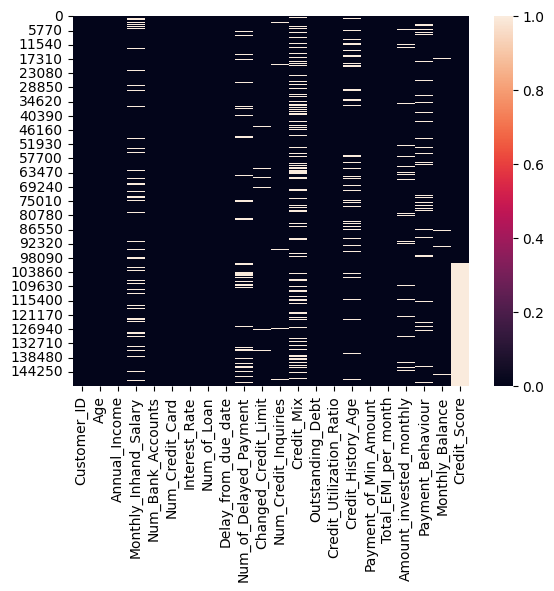

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

Customer_ID                     0
Age                             0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [ ]:
def Reassign_Mode(df, groupby, column, inplace=True):
    def fill_nan_with_mode(group):
        group_without_nan = group.dropna()
        if len(group_without_nan) > 0:
            mode_value = group_without_nan.mode().iloc[0]
            return group.fillna(mode_value)
        else:
            return group

    if inplace:
        df[column] = df.groupby(groupby)[column].transform(fill_nan_with_mode)
    else:
        return df.groupby(groupby)[column].transform(fill_nan_with_mode)

In [ ]:
Reassign_Mode(df, 'Customer_ID', 'Monthly_Inhand_Salary', True)
Reassign_Mode(df, 'Customer_ID', 'Num_of_Delayed_Payment', True)
Reassign_Mode(df, 'Customer_ID', 'Changed_Credit_Limit', True)
Reassign_Mode(df, 'Customer_ID', 'Num_Credit_Inquiries', True)
Reassign_Mode(df, 'Customer_ID', 'Credit_Mix', True)
Reassign_Mode(df, 'Customer_ID', 'Credit_History_Age', True)
Reassign_Mode(df, 'Customer_ID', 'Amount_invested_monthly', True)
Reassign_Mode(df, 'Customer_ID', 'Payment_Behaviour', True)
Reassign_Mode(df, 'Customer_ID', 'Monthly_Balance', True)

In [ ]:
df.isnull().sum()

Customer_ID                     0
Age                             0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

_check and replace negative values_

In [ ]:
numeric = df.select_dtypes(include=[np.number])
columns_with_negative_values = numeric.columns[numeric.lt(0).any()]

print(columns_with_negative_values)

Index(['Num_Bank_Accounts', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Monthly_Balance'],
      dtype='object')


In [ ]:
def convert_negative(data, columns):
    for column in columns:
        if column == 'Monthly_Balance':
            median_value = data[data[column] >= 0][column].median()
            data[column] = np.where(data[column] < 0, median_value, data[column])
        else:
            mode_value = data[column].mode().iloc[0]
            data[column] = np.where(data[column] < 0, mode_value, data[column])
    return data

In [ ]:
convert_negative(df, ['Num_Bank_Accounts', 'Delay_from_due_date', 'Num_of_Loan','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Monthly_Balance'])

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
0              3392  23.0       19114.12            1824.843333   
1              3392  23.0       19114.12            1824.843333   
2              3392  23.0       19114.12            1824.843333   
3              3392  23.0       19114.12            1824.843333   
4              3392  23.0       19114.12            1824.843333   
...             ...   ...            ...                    ...   
149995        34304  28.0       20002.88            1929.906667   
149996        37932  25.0       39628.99            3359.415833   
149997        37932  25.0       39628.99            3359.415833   
149998        37932  25.0       39628.99            3359.415833   
149999        37932  25.0       39628.99            3359.415833   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                       3                4              3            4   
1                       3                4              3            4   
2                       3                4              3            4   
3                       3                4              3            4   
4                       3                4              3            4   
...                   ...              ...            ...          ...   
149995                 10                8             29            5   
149996                  4                6              7            2   
149997                  4                6              7            2   
149998                  4                6              7            2   
149999                  4                6              7            2   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                         3                     7.0                 11.27   
1                        15                     4.0                 11.27   
2                         3                     7.0                 11.27   
3                         5                     4.0                  6.27   
4                         6                     4.0                 11.27   
...                     ...                     ...                   ...   
149995                   33                    25.0                 18.31   
149996                   20                     6.0                 11.50   
149997                   23                     5.0                 13.50   
149998                   21                     6.0                 11.50   
149999                   22                     5.0                 11.50   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0                        4.0         2.0            809.98   
1                        4.0         2.0            809.98   
2                        4.0         2.0            809.98   
3                        4.0         2.0            809.98   
4                        4.0         2.0            809.98   
...                      ...         ...               ...   
149995                  12.0         0.0           3571.70   
149996                   7.0         2.0            502.38   
149997                   7.0         2.0            502.38   
149998                   7.0         2.0            502.38   
149999                   7.0         2.0            502.38   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                      26.822620               265.0                      0   
1                      31.944960               265.0                      0   
2                      28.609352               267.0                      0   
3                      31.377862               268.0                      0   
4                      24.797347               269.0                      0   
...                          ...                 ...                    ...   
149995                 34.780553                68.0                      1   
149996      

### _Checking for duplicates_

In [ ]:
df.duplicated().sum()

0

### _Correcting Outliers_

<function matplotlib.pyplot.show(close=None, block=None)>

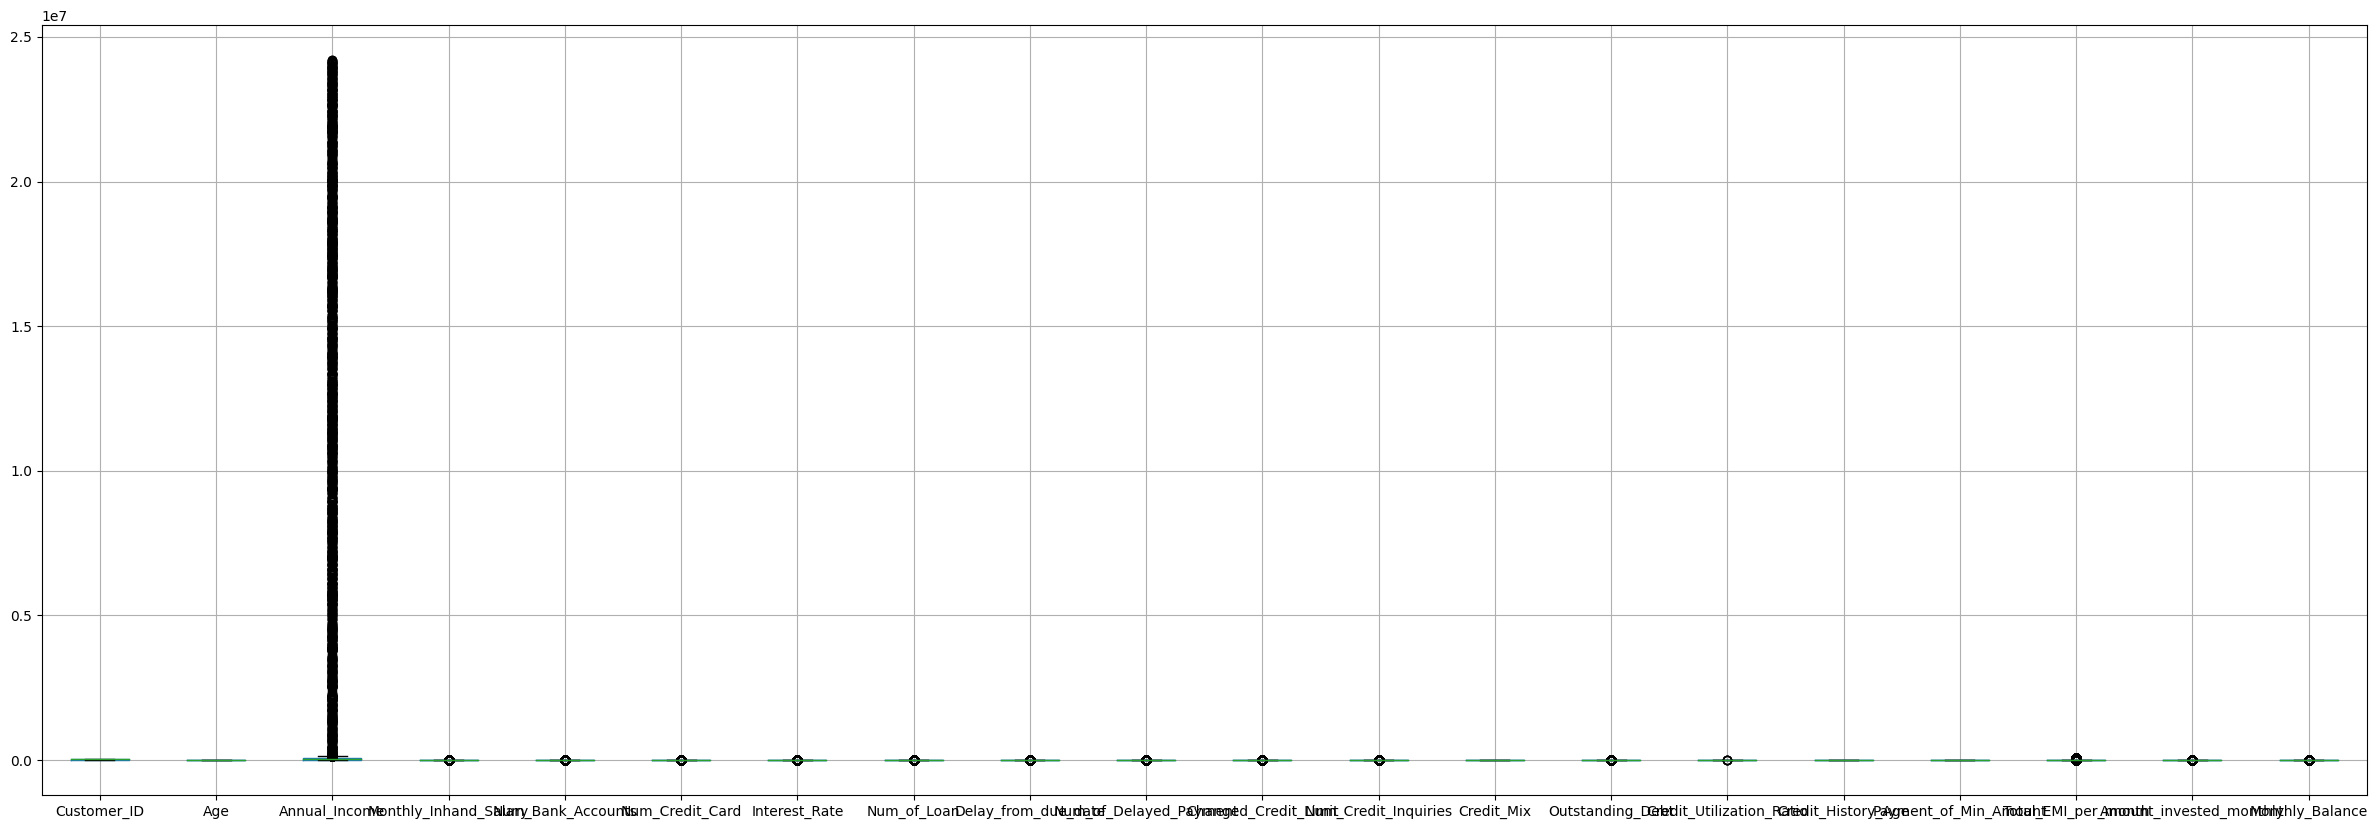

In [ ]:
plt.figure(figsize=(30,10))
df.boxplot()
plt.show

In [ ]:
def outliers(data, column):
    # Calculate the interquartile range (IQR)
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print('lower_bound : ', lower_bound)
    print('upper_bound : ', upper_bound)
    # Detect outlier
    outliers= df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    plt.boxplot(data[column], whis=1.5)
    plt.title(f'Box and Whisker Plot: {column}')
    plt.ylabel(column)
    plt.show()

    return outliers


In [ ]:
def winsorize(data, column):
    # Calculate the interquartile range (IQR)
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Winsorize the values
    winsorized_values = np.where(data[column] < lower_bound, lower_bound, data[column])
    winsorized_values = np.where(winsorized_values > upper_bound, upper_bound, winsorized_values)

    # Replace the original column with the winsorized values
    data[column] = winsorized_values

    return outliers(data, column)


Number of bank accounts

lower_bound :  -3.0
upper_bound :  13.0


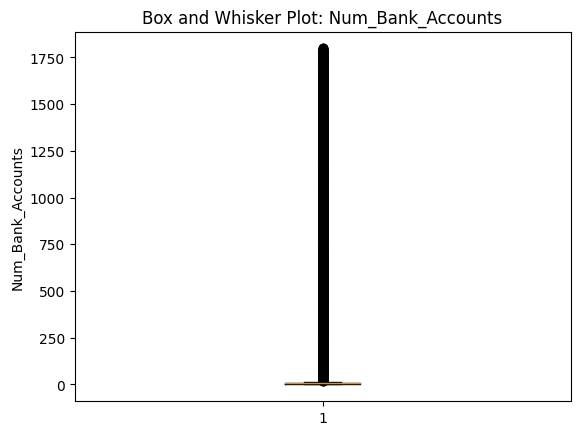

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
267           16388  44.0       58317.00            4664.750000   
288           16512  16.0       29469.98            2227.831667   
310           17068  37.0       15566.02            1423.168333   
339           39873  42.0       20574.47            1740.539167   
356           44763  19.0       85554.03            7185.502500   
...             ...   ...            ...                    ...   
149419        24507  39.0        8272.20             811.350000   
149583        19610  31.0       20758.54            2027.878333   
149643        21230  22.0       87974.28            7222.190000   
149933         7448  44.0       33702.74            2998.561667   
149981        14124  19.0       42903.79            3468.315833   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
267                  1414                5              9            6   
288                  1231                7             24            5   
310                    67                5             32            4   
339                   572                3             14            4   
356                  1488                2              3            3   
...                   ...              ...            ...          ...   
149419                523                8             27            7   
149583               1353                9             20            2   
149643               1240                8             10            2   
149933               1093                3             19            2   
149981               1727                4              6            1   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
267                      18                    23.0                 23.58   
288                      53                    21.0                 26.94   
310                      12                    17.0                 11.24   
339                       6                    12.0                  6.74   
356                      14                     7.0                  6.43   
...                     ...                     ...                   ...   
149419                   27                    23.0                  2.59   
149583                   27                    12.0                  8.63   
149643                    6                     9.0                  6.75   
149933                   11                     8.0                 10.70   
149981                   14                     2.0                  5.10   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
267                     10.0         1.0             98.97   
288                     11.0         0.0           3421.66   
310                      9.0         1.0           1693.95   
339                     11.0         1.0            749.95   
356                      3.0         2.0           1095.73   
...                      ...         ...               ...   
149419                  12.0         0.0           1744.47   
149583                  12.0         1.0           2104.27   
149643                   8.0         1.0             60.08   
149933                   5.0         1.0            636.96   
149981                   1.0         2.0           1079.48   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
267                    29.766107               157.0                      1   
288                    24.639658               159.0                      1   
310                    29.706454               100.0                      1   
339                    36.559538               134.0                      1   
356                    41.661802               239.0                      0   
...                          ...                 ...                    ...   
149419                 33.011837               150.0                      1   
149583      

In [ ]:
outliers(df, 'Num_Bank_Accounts')

lower_bound :  -3.0
upper_bound :  13.0


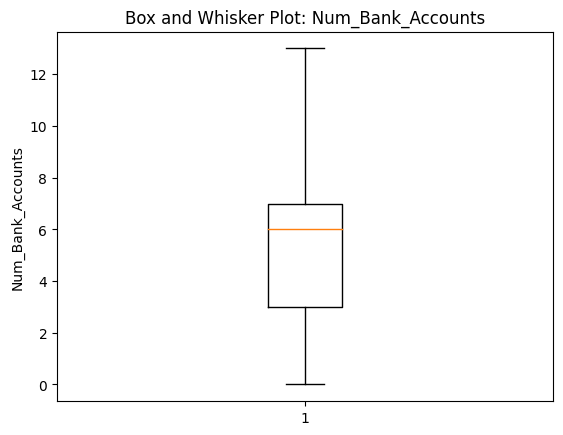

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Num_Bank_Accounts')

Monthly_Inhand_Salary

lower_bound :  -4863.164166666665
upper_bound :  12440.09583333333


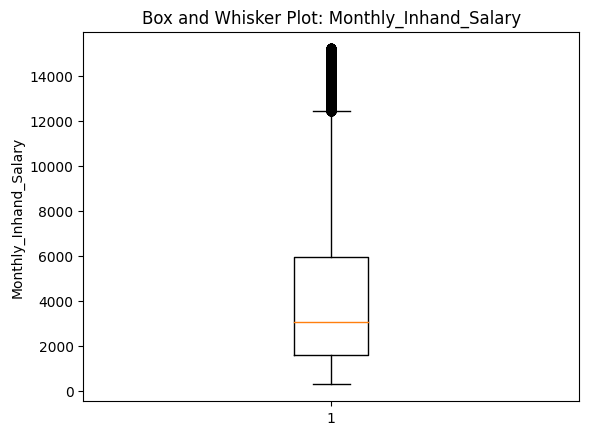

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
1728          11313  30.0      173196.32           14258.026667   
1729          11313  30.0      173196.32           14258.026667   
1730          11313  30.0      173196.32           14258.026667   
1731          11313  30.0      173196.32           14258.026667   
1732          11313  30.0      173196.32           14258.026667   
...             ...   ...            ...                    ...   
149464         8087  50.0      175718.64           14707.220000   
149465         8087  50.0      175718.64           14707.220000   
149466         8087  50.0      175718.64           14707.220000   
149467         8087  50.0      175718.64           14707.220000   
149759         4345  54.0      150131.68           12596.973333   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
1728                  4.0                7              9            1   
1729                  4.0                7              9            1   
1730                  4.0                7              9            1   
1731                  4.0                7              9            1   
1732                  4.0                7              9            1   
...                   ...              ...            ...          ...   
149464                3.0                5             11            0   
149465                3.0                5             11            0   
149466                3.0                5             11            0   
149467                3.0                5           5564            0   
149759                5.0                1              4            3   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
1728                      9                     5.0                  6.06   
1729                     12                     5.0                  6.06   
1730                      7                     5.0                  6.06   
1731                      8                     5.0                  6.06   
1732                      7                     5.0                  6.06   
...                     ...                     ...                   ...   
149464                   12                     6.0                  6.85   
149465                    9                     6.0                  6.85   
149466                   12                     6.0                  1.85   
149467                   12                     5.0                  6.85   
149759                    8                     0.0                 11.49   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
1728                     4.0         2.0            967.23   
1729                     4.0         2.0            967.23   
1730                     4.0         2.0            967.23   
1731                     4.0         2.0            967.23   
1732                     4.0         2.0            967.23   
...                      ...         ...               ...   
149464                   5.0         2.0           1336.86   
149465                   5.0         2.0           1336.86   
149466                   5.0         2.0           1336.86   
149467                   5.0         2.0           1336.86   
149759                   0.0         2.0           1138.36   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
1728                   37.228795               341.0                      0   
1729                   34.109317               342.0                      0   
1730                   40.809043               343.0                      0   
1731                   38.556001               344.0                      0   
1732                   32.884290               345.0                      0   
...                          ...                 ...                    ...   
149464                 25.549184               282.0                      0   
149465      

In [ ]:
outliers(df, 'Monthly_Inhand_Salary')

lower_bound :  -4863.164166666665
upper_bound :  12440.09583333333


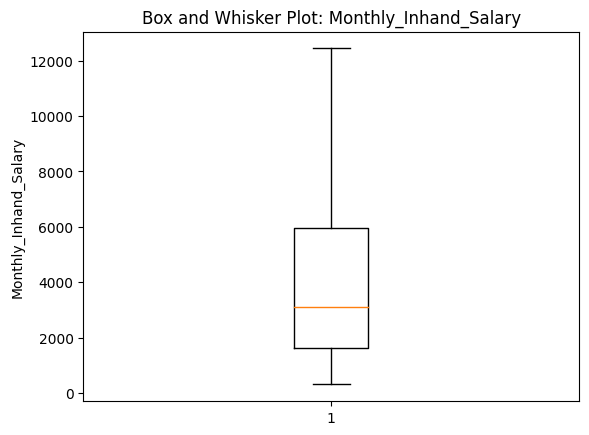

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Monthly_Inhand_Salary')

Annual Income

lower_bound :  -60556.63249999999
upper_bound :  152809.0275


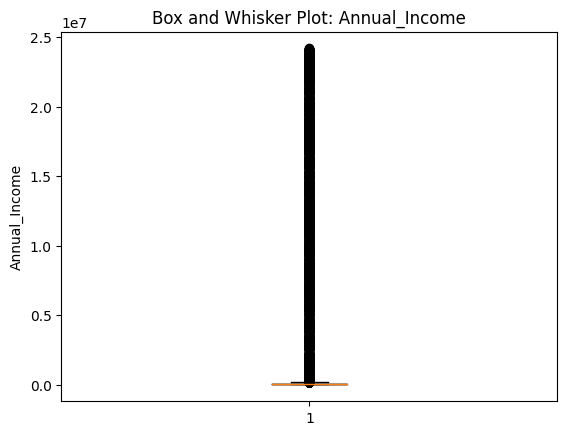

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
54            10314  34.0     10909427.0           10469.207759   
231           49150  40.0      6515990.0            2210.032500   
245           39537  55.0       586359.0            1684.168333   
361           36507  15.0     18334118.0            4369.482500   
368           24733  27.0     19717385.0            1057.435833   
...             ...   ...            ...                    ...   
149546        18082  45.0      9420043.0             840.487083   
149654        16851  43.0      7659200.0            5321.023333   
149690        31357  41.0     10681037.0            1414.111667   
149707        37025  37.0     12608143.0            2770.881667   
149857        44477  27.0       250738.0            2799.830833   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
54                    0.0                1              8            2   
231                   6.0                3             15            3   
245                   1.0                5              1            2   
361                  10.0               10             18            8   
368                   7.0               10             33            9   
...                   ...              ...            ...          ...   
149546                7.0                6             17            1   
149654                0.0                3             12            0   
149690                4.0               10             22            4   
149707                7.0               10             18            7   
149857                5.0                6              8            4   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
54                        0                     2.0                  9.34   
231                      25                    12.0                  4.89   
245                       5                     7.0                  6.83   
361                      30                    18.0                 20.99   
368                      59                    24.0                  8.82   
...                     ...                     ...                   ...   
149546                    8                    20.0                  2.76   
149654                    6                     2.0                 12.05   
149690                    9                     9.0                 14.90   
149707                   28                    20.0                  6.31   
149857                   10                    12.0                  9.92   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
54                       4.0         2.0            352.16   
231                      2.0         1.0            400.07   
245                      4.0         2.0            413.32   
361                     11.0         0.0           3422.49   
368                     11.0         0.0           2797.17   
...                      ...         ...               ...   
149546                   3.0         1.0           1475.23   
149654                   3.0         2.0             68.66   
149690                  11.0         1.0           2509.06   
149707                  16.0         0.0           1473.28   
149857                   0.0         2.0             82.15   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
54                     26.947565               373.0                      0   
231                    23.177617               370.0                      1   
245                    28.836349               224.0                      0   
361                    36.729939               126.0                      1   
368                    25.314339               167.0                      1   
...                          ...                 ...                    ...   
149546                 27.237317               224.0                      0   
149654      

In [ ]:
outliers(df, 'Annual_Income')

lower_bound :  -60556.63249999999
upper_bound :  152809.0275


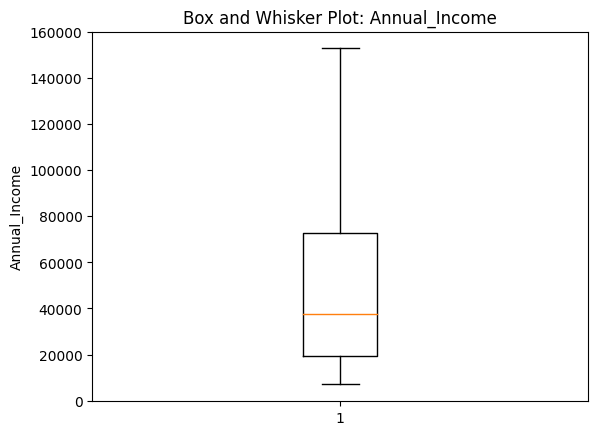

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Annual_Income')

Number of Credit Cards

lower_bound :  -0.5
upper_bound :  11.5


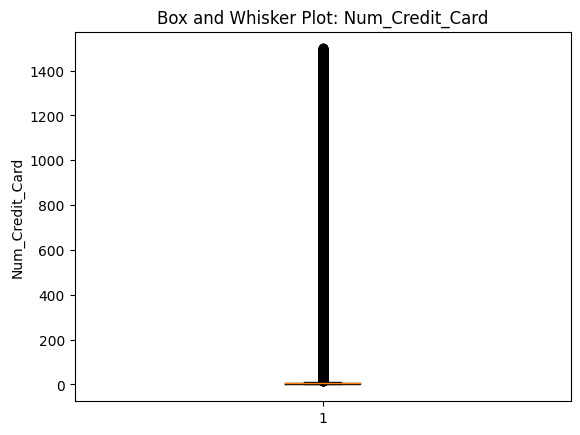

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
10             8625  28.0       34847.84            3037.986667   
40            38382  31.0       73928.46            5988.705000   
157           16640  32.0       19300.34            1512.361667   
163            4911  41.0       19514.88            1828.240000   
207           19779  48.0       20787.69            1999.307500   
...             ...   ...            ...                    ...   
149692        38493  38.0       96048.00            8139.000000   
149782         1616  28.0       21471.58            1879.298333   
149843        26858  47.0       41646.88            3515.573333   
149855        50068  34.0      108484.38            8820.365000   
149885        49989  24.0       60015.32            5121.276667   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
10                    2.0             1385              6            1   
40                    4.0             1288              8            0   
157                   6.0             1029             17            5   
163                   7.0              488             17            0   
207                   8.0             1381             14            3   
...                   ...              ...            ...          ...   
149692                3.0             1447              6            3   
149782                7.0              466             16            2   
149843                4.0             1439              3            4   
149855                4.0             1423              6            1   
149885                7.0              955             14            7   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
10                        3                    19.0                  5.42   
40                       12                    10.0                 10.14   
157                      51                    17.0                  9.95   
163                      30                    12.0                  4.17   
207                      22                    14.0                  8.13   
...                     ...                     ...                   ...   
149692                    8                     9.0                  7.94   
149782                   22                     6.0                  5.00   
149843                    5                    10.0                 11.62   
149855                   29                    18.0                  4.07   
149885                    8                     7.0                 10.47   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
10                       2.0         2.0            605.03   
40                       2.0         2.0            548.20   
157                      8.0         0.0           2430.21   
163                      2.0         1.0            881.40   
207                      3.0         1.0            614.60   
...                      ...         ...               ...   
149692                   1.0         2.0            875.35   
149782                   4.0         1.0             68.06   
149843                   5.0         2.0            732.11   
149855                   7.0         1.0           1427.16   
149885                   7.0         1.0           1095.15   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
10                     33.224951               321.0                      0   
40                     39.962685               384.0                      0   
157                    25.847791               223.0                      1   
163                    34.503707               234.0                      0   
207                    35.344188               221.0                      0   
...                          ...                 ...                    ...   
149692                 34.519491               202.0                      0   
149782      

In [ ]:
outliers(df, 'Num_Credit_Card')

lower_bound :  -0.5
upper_bound :  11.5


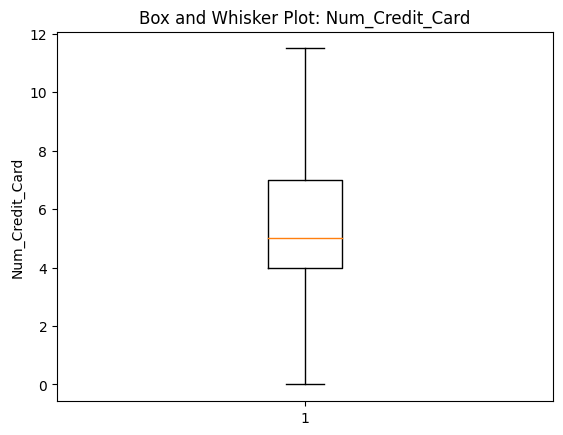

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Num_Credit_Card')

Interest Rate

lower_bound :  -10.0
upper_bound :  38.0


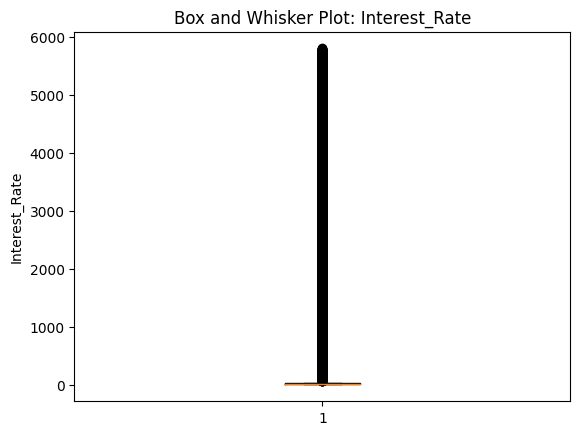

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
44            38382  31.0       73928.46            5988.705000   
89            49323  33.0       88640.24            7266.686667   
167            4911  41.0       19514.88            1828.240000   
178           44166  20.0      106733.13            8873.427500   
229           49150  40.0       28572.39            2210.032500   
...             ...   ...            ...                    ...   
149865        25236  28.0       32825.81            2649.484167   
149939        14421  28.0      118677.54            9963.795000   
149988        44897  50.0       37188.10            3097.008333   
149989        44897  50.0       37188.10            3097.008333   
149990        44897  50.0       37188.10            3097.008333   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
44                    4.0              5.0           5318            0   
89                    3.0              6.0            433            2   
167                   7.0              5.0           5240            0   
178                   4.0              4.0           4975            0   
229                   6.0              3.0            668            3   
...                   ...              ...            ...          ...   
149865                2.0              7.0           3690            4   
149939                4.0              4.0           1931            4   
149988                1.0              4.0           5261            3   
149989                1.0              4.0           2658            3   
149990                1.0              4.0           4252            3   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
44                       11                     7.0                 10.14   
89                        4                     2.0                  3.51   
167                      26                    11.0                  4.17   
178                       2                     6.0                  0.86   
229                      25                    11.0                  4.89   
...                     ...                     ...                   ...   
149865                   15                     5.0                  1.94   
149939                    3                    10.0                  4.59   
149988                    7                    12.0                  9.38   
149989                    7                    12.0                  5.38   
149990                    7                    12.0                  5.38   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
44                       2.0         2.0            548.20   
89                       3.0         2.0            950.36   
167                      4.0         1.0            881.40   
178                      0.0         2.0             76.23   
229                      2.0         1.0            400.07   
...                      ...         ...               ...   
149865                   6.0         2.0           1035.24   
149939                   5.0         2.0            995.47   
149988                   3.0         2.0            620.64   
149989                   3.0         2.0            620.64   
149990                   3.0         2.0            620.64   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
44                     26.333310               387.0                      0   
89                     41.036168               306.0                      0   
167                    28.781888               238.0                      0   
178                    42.070459               395.0                      0   
229                    35.693949               368.0                      1   
...                          ...                 ...                    ...   
149865                 37.214116               335.0                      0   
149939      

In [ ]:
outliers(df, 'Interest_Rate')

lower_bound :  -10.0
upper_bound :  38.0


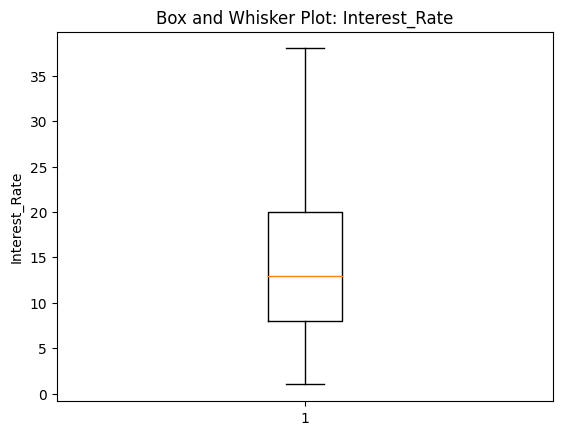

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Interest_Rate')

Number of loan

lower_bound :  -2.5
upper_bound :  9.5


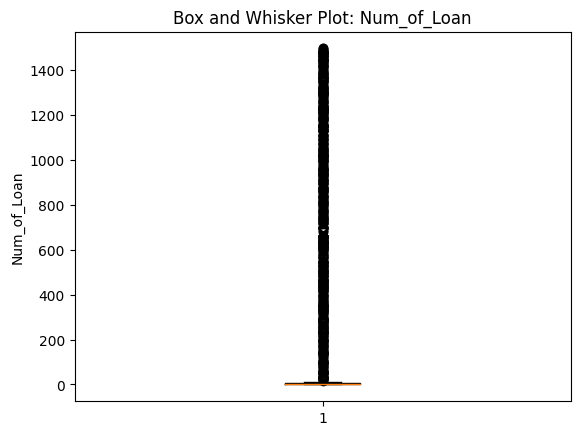

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
21            11708  34.0      143162.64           12187.220000   
810           25653  26.0      134321.44           11064.453333   
1390          25806  21.0      124419.66           10221.305000   
2008          16982  21.0       31069.32            2361.110000   
2273           3929  22.0       38539.57            3438.630833   
...             ...   ...            ...                    ...   
149347         7299  31.0       76387.05            6104.587500   
149348        29198  27.0       14458.00            1251.833333   
149387        10741  37.0      101316.64            8526.053333   
149402        32077  22.0       40511.74            3439.978333   
149745        10508  41.0       28954.04            2703.836667   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
21                    1.0              5.0            8.0          967   
810                   3.0              5.0           12.0         1464   
1390                  3.0              4.0           11.0          622   
2008                  2.0              3.0           12.0          352   
2273                  4.0              2.0            3.0          472   
...                   ...              ...            ...          ...   
149347                5.0              4.0           20.0           25   
149348                3.0              8.0           29.0         1442   
149387                3.0              6.0            9.0          939   
149402                3.0              6.0           16.0          172   
149745                8.0              5.0           25.0         1296   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
21                        8                     6.0                  7.10   
810                      26                    21.0                  4.09   
1390                      9                    10.0                  7.12   
2008                     14                     3.0                  7.78   
2273                      4                     1.0                  8.42   
...                     ...                     ...                   ...   
149347                   22                    13.0                  2.65   
149348                   19                     8.0                 10.73   
149387                   16                    18.0                 11.92   
149402                   28                    20.0                 14.18   
149745                   35                    16.0                 15.61   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
21                       3.0         2.0           1303.01   
810                      3.0         1.0           1428.68   
1390                  1265.0         2.0            923.85   
2008                     2.0         2.0            343.60   
2273                     0.0         2.0            526.62   
...                      ...         ...               ...   
149347                   2.0         1.0           1001.62   
149348                  13.0         1.0           1701.54   
149387                   7.0         1.0            559.18   
149402                   9.0         1.0           2272.58   
149745                  10.0         0.0           2077.68   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
21                     39.783993               218.0                      0   
810                    34.223492               394.0                      1   
1390                   27.446584               389.0                      0   
2008                   36.403191               227.0                      0   
2273                   30.039998               356.0                      0   
...                          ...                 ...                    ...   
149347                 40.561332               243.0                      0   
149348      

In [ ]:
outliers(df, 'Num_of_Loan')

lower_bound :  -2.5
upper_bound :  9.5


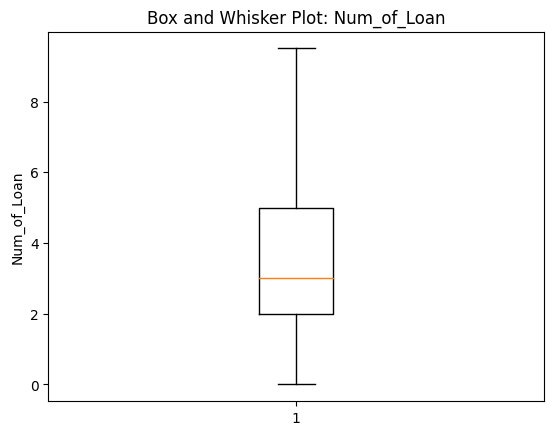

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Num_of_Loan')

Delay from due date

lower_bound :  -17.0
upper_bound :  55.0


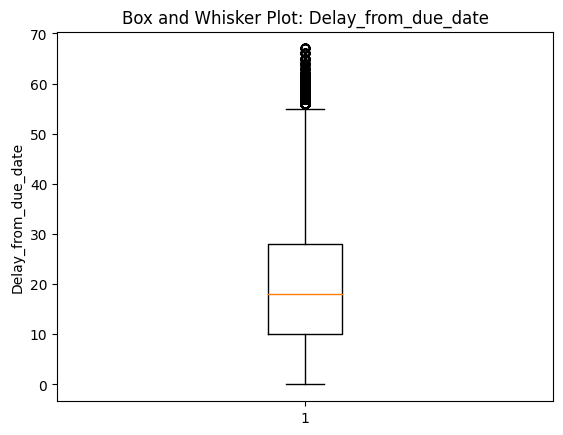

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
232           46721  37.0      39641.540            3007.461667   
233           46721  37.0      39641.540            3007.461667   
234           46721  37.0      39641.540            3007.461667   
235           46721  37.0      39641.540            3007.461667   
236           46721  37.0      39641.540            3007.461667   
...             ...   ...            ...                    ...   
149587        43323  42.0      59597.840            5173.486667   
149700        31589  28.0       8968.555             880.379583   
149701        31589  28.0       8968.555             880.379583   
149702        31589  28.0       8968.555             880.379583   
149703        31589  28.0       8968.555             880.379583   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
232                  10.0              8.0           25.0          6.0   
233                  10.0              8.0           25.0          6.0   
234                  10.0              8.0           25.0          6.0   
235                  10.0              8.0           25.0          3.0   
236                  10.0              8.0           25.0          6.0   
...                   ...              ...            ...          ...   
149587                7.0              5.0           32.0          9.0   
149700               10.0              8.0           30.0          8.0   
149701               10.0              8.0           30.0          8.0   
149702               10.0              8.0           30.0          8.0   
149703               10.0              8.0           30.0          8.0   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
232                      61                    13.0                  1.54   
233                      61                    16.0                  1.54   
234                      61                    15.0                  1.54   
235                      61                    16.0                  1.54   
236                      61                    16.0                  1.54   
...                     ...                     ...                   ...   
149587                   59                    15.0                 29.53   
149700                   58                    19.0                 22.83   
149701                   58                    21.0                 23.83   
149702                   58                    19.0                 23.83   
149703                   58                    20.0                 23.83   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
232                      6.0         0.0           2258.73   
233                      8.0         0.0           2258.73   
234                    568.0         0.0           2258.73   
235                      8.0         0.0           2258.73   
236                      8.0         0.0           2258.73   
...                      ...         ...               ...   
149587                  14.0         0.0           3111.29   
149700                  15.0         0.0           2502.86   
149701                  15.0         0.0           2502.86   
149702                  15.0         0.0           2502.86   
149703                  15.0         0.0           2502.86   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
232                    34.125705               105.0                      1   
233                    33.414598               105.0                      1   
234                    27.572863               106.0                      1   
235                    32.413447               107.0                      1   
236                    25.983230               108.0                      1   
...                          ...                 ...                    ...   
149587                 24.511507                22.0                      1   
149700      

In [ ]:
outliers(df, 'Delay_from_due_date')

lower_bound :  -17.0
upper_bound :  55.0


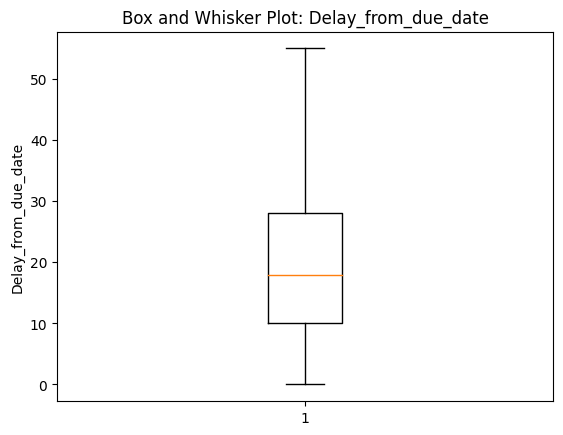

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Delay_from_due_date')

Number of Credit Inquiries

lower_bound :  -6.0
upper_bound :  18.0


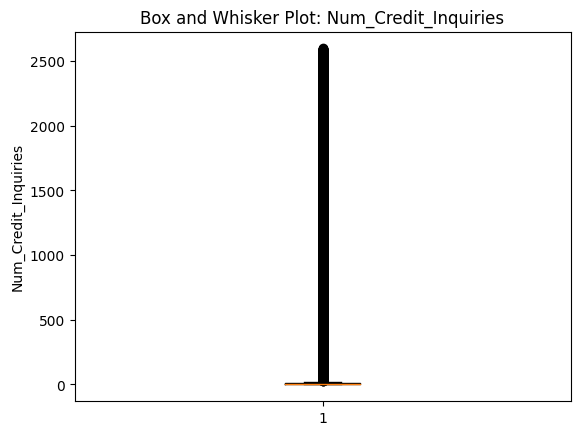

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
173           41326  42.0      10183.015            1074.584583   
193           42489  34.0      57983.120            4720.926667   
198           42489  34.0      57983.120            4720.926667   
234           46721  37.0      39641.540            3007.461667   
312           22303  18.0      66567.320            5800.276667   
...             ...   ...            ...                    ...   
149657        23415  23.0      81431.960            6790.996667   
149848         7848  30.0      33896.530            2667.710833   
149890        37036  40.0      18512.970            1494.747500   
149955        41043  40.0      87695.340            7337.945000   
149979         8324  21.0      38321.390            3106.647859   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
173                   7.0              5.0           17.0          5.0   
193                   9.0              8.0           31.0          8.0   
198                   9.0              8.0           31.0          8.0   
234                  10.0              8.0           25.0          6.0   
312                   5.0              7.0            5.0          2.0   
...                   ...              ...            ...          ...   
149657                4.0              7.0            5.0          2.0   
149848                7.0              3.0           18.0          2.0   
149890                7.0              5.0           18.0          3.0   
149955                2.0              7.0            7.0          0.0   
149979                4.0              4.0            3.0          4.0   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
173                    48.0                    24.0                 10.97   
193                    53.0                    21.0                  7.27   
198                    49.0                    21.0                  7.27   
234                    55.0                    15.0                  1.54   
312                     7.0                    15.0                  7.67   
...                     ...                     ...                   ...   
149657                 23.0                    19.0                 16.16   
149848                 25.0                    10.0                 10.95   
149890                 15.0                    11.0                 16.95   
149955                  9.0                    13.0                  6.52   
149979                 11.0                     7.0                  1.59   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
173                   1050.0         0.0           1672.43   
193                   1044.0         0.0           3532.83   
198                   1936.0         0.0           3532.83   
234                    568.0         0.0           2258.73   
312                   1618.0         1.0            233.79   
...                      ...         ...               ...   
149657                1181.0         1.0           2352.06   
149848                 651.0         1.0            807.65   
149890                 391.0         1.0           1366.56   
149955                 840.0         2.0            361.68   
149979                 352.0         2.0            678.57   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
173                    25.105403               126.0                      1   
193                    37.873642               147.0                      1   
198                    24.631497               152.0                      1   
234                    27.572863               106.0                      1   
312                    34.456272               291.0                      0   
...                          ...                 ...                    ...   
149657                 23.660680               116.0                      1   
149848      

In [ ]:
outliers(df, 'Num_Credit_Inquiries')

lower_bound :  -6.0
upper_bound :  18.0


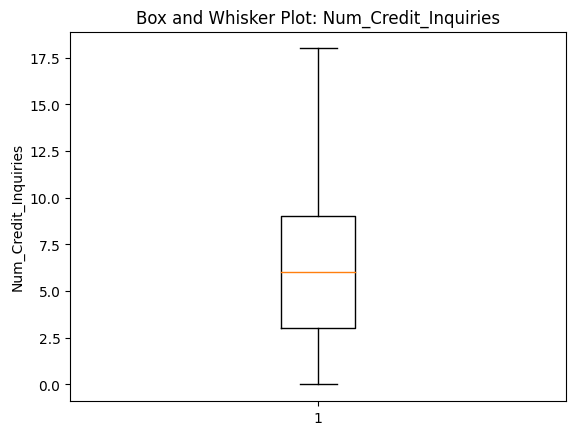

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Num_Credit_Inquiries')

Number of Delayed Payment

lower_bound :  -4.5
upper_bound :  31.5


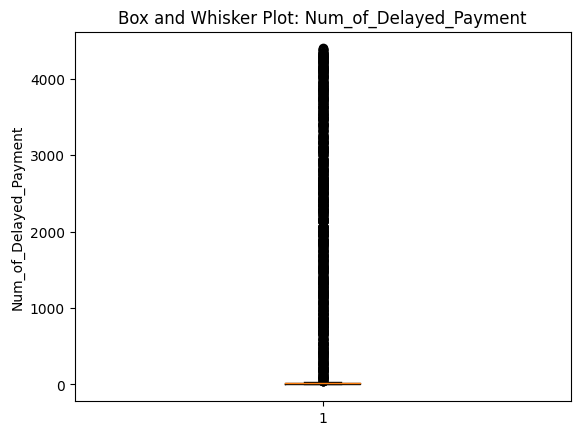

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
252           24648  43.0      18627.640            1387.303333   
284           39828  36.0      71681.400            5799.450000   
304           17068  36.0      15566.020            1423.168333   
409           47494  14.0      39887.220            3224.935000   
643           30944  47.0      17787.340            1242.278333   
...             ...   ...            ...                    ...   
149475        40700  28.0      33418.550            2739.879167   
149635        42604  24.0      74349.180            6133.765000   
149738         6486  35.0      15666.495            1342.541250   
149772         9783  28.0      29090.500            2472.208333   
149838        48527  32.0     107911.600            8491.808664   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
252                   7.0              7.0           19.0          6.0   
284                   3.0              6.0           15.0          1.0   
304                   8.0              5.0           32.0          4.0   
409                   9.0              9.0           16.0          5.0   
643                   8.0              4.0           16.0          2.0   
...                   ...              ...            ...          ...   
149475                6.0              3.0            5.0          2.0   
149635                0.0              3.0            2.0          2.0   
149738                4.0              7.0            8.0          7.0   
149772                5.0              7.0           20.0          4.0   
149838                3.0              3.0           17.0          2.0   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
252                    31.0                  3318.0                  5.07   
284                     8.0                  3083.0                 10.44   
304                    16.0                  1338.0                  9.24   
409                    55.0                  3104.0                 11.25   
643                     6.0                   183.0                  5.65   
...                     ...                     ...                   ...   
149475                  6.0                  1970.0                 20.98   
149635                 11.0                  3913.0                  1.64   
149738                 28.0                   533.0                 13.45   
149772                 16.0                   332.0                 13.07   
149838                 19.0                  2034.0                 11.31   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
252                      7.0         0.0           1793.54   
284                      0.0         1.0           1293.02   
304                      7.0         1.0           1693.95   
409                     14.0         0.0           3119.60   
643                      0.0         1.0            730.90   
...                      ...         ...               ...   
149475                   7.0         1.0            415.34   
149635                   5.0         2.0            929.91   
149738                   6.0         1.0            284.89   
149772                   6.0         1.0           1612.70   
149838                   5.0         1.0           1086.96   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
252                    25.585205               229.0                      1   
284                    40.791137               311.0                      1   
304                    37.409934                94.0                      1   
409                    26.112222               150.0                      1   
643                    34.903092               360.0                      0   
...                          ...                 ...                    ...   
149475                 39.718589               136.0                      1   
149635      

In [ ]:
outliers(df, 'Num_of_Delayed_Payment')

lower_bound :  -4.5
upper_bound :  31.5


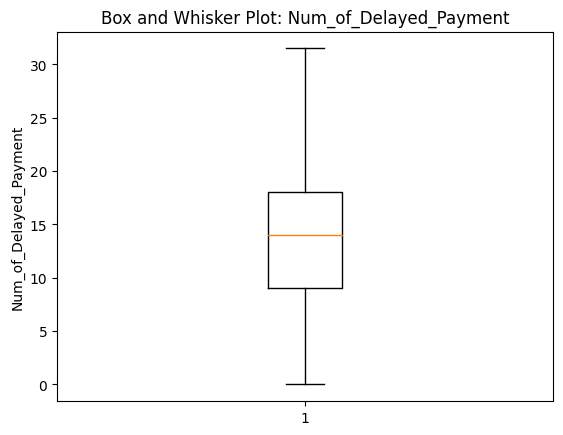

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Num_of_Delayed_Payment')

Changed Credit Limit

lower_bound :  -8.094999999999999
upper_bound :  28.585


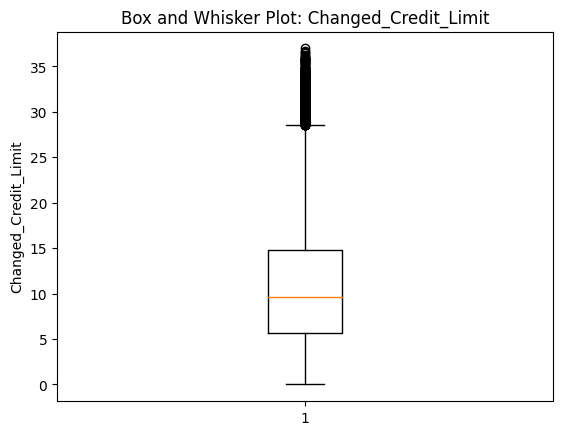

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
584           14412  41.0        9841.34             690.111667   
585           14412  41.0        9841.34             690.111667   
586           14412  41.0        9841.34             690.111667   
587           14412  42.0        9841.34             690.111667   
588           14412  42.0        9841.34             690.111667   
...             ...   ...            ...                    ...   
149602        24127  31.0       33137.28            2978.440000   
149874        40163  22.0       14734.29            1393.857500   
149875        40163  22.0       14734.29            1393.857500   
149878        19087  24.0       34493.92            3043.493333   
149903         4658  17.0       14937.49            1142.790833   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
584                   8.0              9.0           31.0          5.0   
585                   8.0              9.0           31.0          5.0   
586                   8.0              9.0           31.0          5.0   
587                   8.0              9.0           31.0          5.0   
588                   8.0              9.0           31.0          5.0   
...                   ...              ...            ...          ...   
149602                7.0             10.0           26.0          3.0   
149874                7.0              6.0           22.0          6.0   
149875                7.0              6.0           22.0          6.0   
149878                9.0             10.0           24.0          7.0   
149903                8.0              8.0           22.0          7.0   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
584                    55.0                    16.0                 29.52   
585                    55.0                    15.0                 29.52   
586                    55.0                    15.0                 31.52   
587                    55.0                    15.0                 29.52   
588                    55.0                    13.0                 29.52   
...                     ...                     ...                   ...   
149602                 45.0                    16.0                 28.71   
149874                 25.0                    19.0                 28.76   
149875                 27.0                    19.0                 28.76   
149878                 25.0                    20.0                 32.16   
149903                 42.0                    15.0                 29.17   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
584                      8.0         0.0           4984.82   
585                      8.0         0.0           4984.82   
586                      8.0         0.0           4984.82   
587                      8.0         0.0           4984.82   
588                      8.0         0.0           4984.82   
...                      ...         ...               ...   
149602                  18.0         0.0           3581.22   
149874                  12.0         0.0           4317.42   
149875                  12.0         0.0           4317.42   
149878                  13.0         0.0           4138.67   
149903                   9.0         0.0           3699.44   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
584                    27.334690                53.0                      1   
585                    33.459803                54.0                      1   
586                    35.251754                55.0                      1   
587                    38.768491                56.0                      1   
588                    28.496918                57.0                      1   
...                          ...                 ...                    ...   
149602                 25.609915               102.0                      1   
149874      

In [ ]:
outliers(df, 'Changed_Credit_Limit')

lower_bound :  -8.094999999999999
upper_bound :  28.585


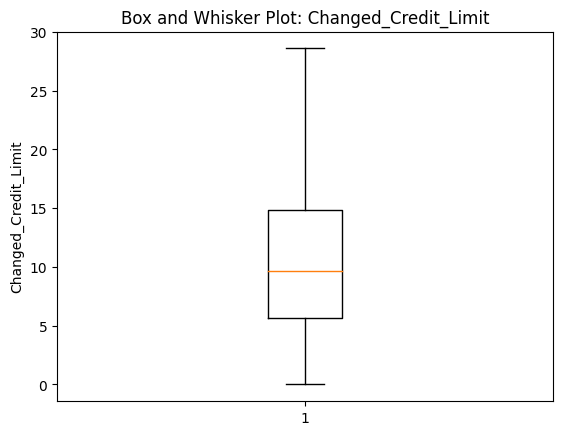

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Changed_Credit_Limit')

Outstanding Debt

lower_bound :  -1503.7625
upper_bound :  4015.7975


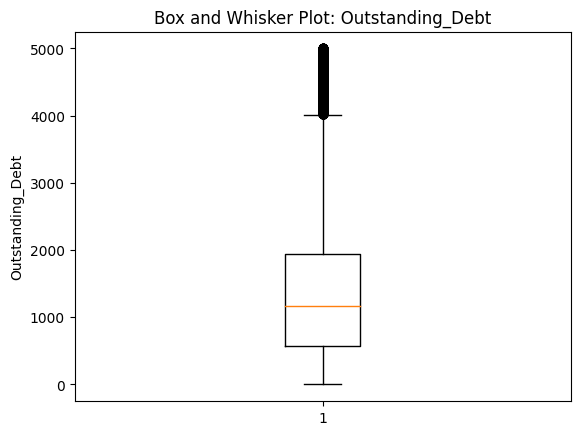

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
416           48667  43.0     14129.7600            1012.480000   
417           48667  44.0     14129.7600            1012.480000   
418           48667  44.0     14129.7600            1012.480000   
419           48667  44.0     14129.7600            1012.480000   
420           48667  44.0    152809.0275            1012.480000   
...             ...   ...            ...                    ...   
149879        19087  24.0     34493.9200            3043.493333   
149924        12360  41.0     81093.1600            7017.763333   
149925        12360  41.0     81093.1600            7017.763333   
149926        12360  41.0     81093.1600            7017.763333   
149927        12360  41.0     81093.1600            7017.763333   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
416                   8.0              5.0           21.0          8.0   
417                   8.0              5.0           21.0          8.0   
418                   8.0              5.0           21.0          8.0   
419                   8.0              5.0           21.0          8.0   
420                   8.0              5.0           21.0          8.0   
...                   ...              ...            ...          ...   
149879                9.0             10.0           24.0          7.0   
149924               10.0              7.0           17.0          3.0   
149925               10.0              7.0           17.0          7.0   
149926               10.0              7.0           17.0          7.0   
149927               10.0              7.0           17.0          7.0   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
416                    55.0                    17.0                  5.51   
417                    55.0                    18.0                  5.51   
418                    55.0                    18.0                  5.51   
419                    55.0                    21.0                  5.51   
420                    55.0                    21.0                 12.51   
...                     ...                     ...                   ...   
149879                 27.0                    16.0                 25.16   
149924                 28.0                    22.0                 15.72   
149925                 29.0                    20.0                  9.72   
149926                 29.0                    20.0                 15.72   
149927                 24.0                    20.0                 15.72   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
416                      6.0         0.0           4071.62   
417                      6.0         0.0           4071.62   
418                      6.0         0.0           4071.62   
419                      6.0         0.0           4071.62   
420                      6.0         0.0           4071.62   
...                      ...         ...               ...   
149879                  13.0         0.0           4138.67   
149924                  12.0         0.0           4523.30   
149925                  12.0         0.0           4523.30   
149926                  12.0         0.0           4523.30   
149927                  12.0         0.0           4523.30   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
416                    36.137292               151.0                      1   
417                    28.134149               152.0                      1   
418                    39.161063               153.0                      1   
419                    33.111022               154.0                      1   
420                    26.429152               151.0                      1   
...                          ...                 ...                    ...   
149879                 25.505631                74.0                      1   
149924      

In [ ]:
outliers(df, 'Outstanding_Debt')

lower_bound :  -1503.7625
upper_bound :  4015.7975


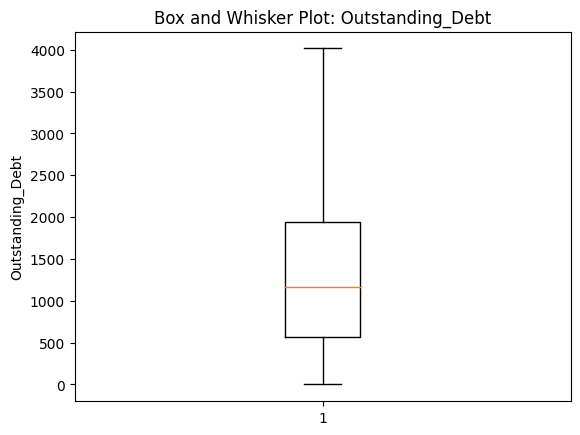

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Outstanding_Debt')

Credit Utilization Ratio

lower_bound :  15.404896986004324
upper_bound :  49.137787958522345


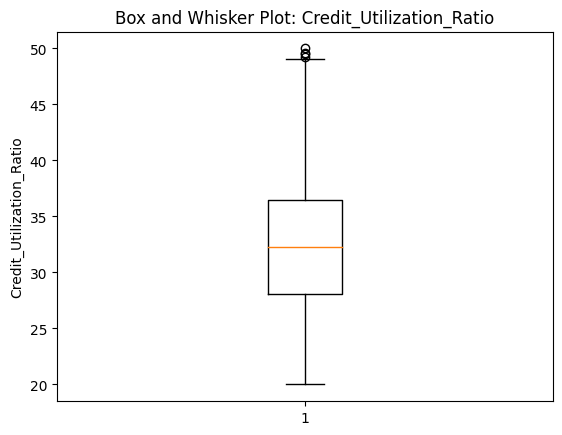

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
9382         13909  30.0    152809.0275           12440.095833   
17029        40826  55.0    152809.0275           12440.095833   
62954        43418  55.0    152809.0275           12440.095833   
68000        29980  19.0    152809.0275           12440.095833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
9382                 0.0              6.0            6.0          0.0   
17029                1.0              1.0           11.0          0.0   
62954               13.0              6.0           12.0          0.0   
68000                5.0              5.0            9.0          1.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
9382                   8.0                     8.0                 10.76   
17029                 14.0                     5.0                  9.72   
62954                  6.0                     2.0                  6.57   
68000                 13.0                     9.0                 11.50   

       Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
9382                    0.0         2.0            685.01   
17029                   7.0         2.0           1015.37   
62954                   3.0         2.0            166.75   
68000                   3.0         2.0           1182.91   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
9382                  50.000000               373.0                      0   
17029                 49.522324               261.0                      0   
62954                 49.254983               311.0                      0   
68000                 49.564519               305.0                      0   

       Total_EMI_per_month  Amount_invested_monthly  \
9382           1634.213281               188.162068   
17029             0.000000               137.636169   
62954             0.000000               183.280971   
68000            74.732590               121.328983   

                      Payment_Behaviour  Monthly_Balance Credit_Score  
9382   High_spent_Medium_value_payments      1533.102266     Standard  
17029   High_spent_Large_value_payments      1566.613165         Good  
62954   High_spent_Large_value_payments      1542.274695     Standard  
68000   High_spent_Large_value_payments      1552.946094     Standard

In [ ]:
outliers(df, 'Credit_Utilization_Ratio')

lower_bound :  15.404896986004324
upper_bound :  49.137787958522345


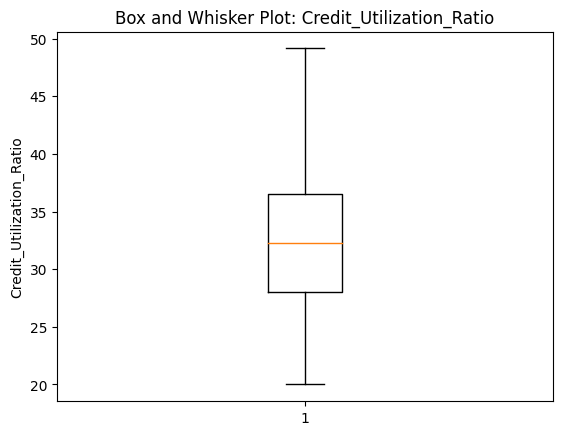

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Credit_Utilization_Ratio')

Total EMI per month

lower_bound :  -172.04989544593764
upper_bound :  369.27722603214465


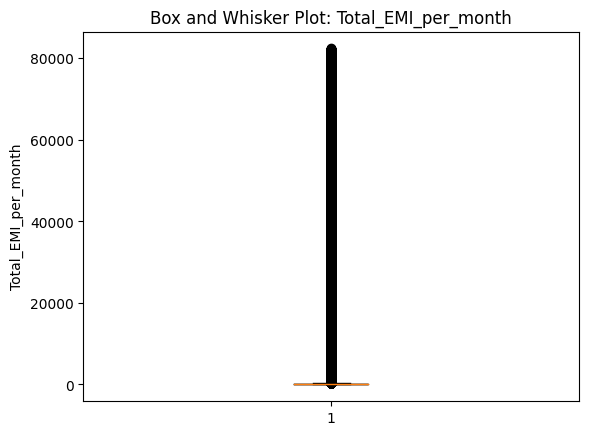

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
40            38382  31.0       73928.46            5988.705000   
45            38382  31.0       73928.46            5988.705000   
50            10314  34.0      131313.40           10469.207759   
51            10314  34.0      131313.40           10469.207759   
52            10314  34.0      131313.40           10469.207759   
...             ...   ...            ...                    ...   
149960         9812  38.0      139664.96           11777.746667   
149961         9812  38.0      139664.96           11777.746667   
149962         9812  38.0      139664.96           11777.746667   
149963         9812  38.0      139664.96           10699.849855   
149991        44897  50.0       37188.10            3097.008333   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
40                    4.0             11.5            8.0          0.0   
45                    4.0              5.0            8.0          0.0   
50                    0.0              1.0            8.0          2.0   
51                    0.0              1.0            8.0          2.0   
52                    0.0              1.0            8.0          2.0   
...                   ...              ...            ...          ...   
149960                3.0              6.0           12.0          4.0   
149961                3.0              6.0           12.0          4.0   
149962                3.0              6.0           12.0          4.0   
149963                3.0              6.0           12.0          4.0   
149991                1.0              4.0            5.0          3.0   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
40                     12.0                    10.0                 10.14   
45                      7.0                     7.0                 10.14   
50                      0.0                     3.0                  9.34   
51                      0.0                     2.0                  8.34   
52                      0.0                     4.0                  9.34   
...                     ...                     ...                   ...   
149960                 14.0                    12.0                 12.39   
149961                 13.0                    12.0                 12.39   
149962                 14.0                    12.0                 13.39   
149963                 12.0                    12.0                 14.39   
149991                  3.0                    12.0                  5.38   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
40                       2.0         2.0            548.20   
45                       2.0         2.0            548.20   
50                       4.0         2.0            352.16   
51                       4.0         2.0            352.16   
52                       4.0         2.0            352.16   
...                      ...         ...               ...   
149960                   9.0         1.0            365.66   
149961                   9.0         1.0            365.66   
149962                   9.0         1.0            365.66   
149963                   9.0         1.0            365.66   
149991                   3.0         2.0            620.64   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
40                     39.962685               384.0                      0   
45                     35.275437               384.0                      0   
50                     31.803134               369.0                      0   
51                     42.645785               370.0                      0   
52                     40.902517               371.0                      0   
...                          ...                 ...                    ...   
149960                 38.697531               363.0                      1   
149961      

In [ ]:
outliers(df, 'Total_EMI_per_month')

lower_bound :  -172.04989544593764
upper_bound :  369.27722603214465


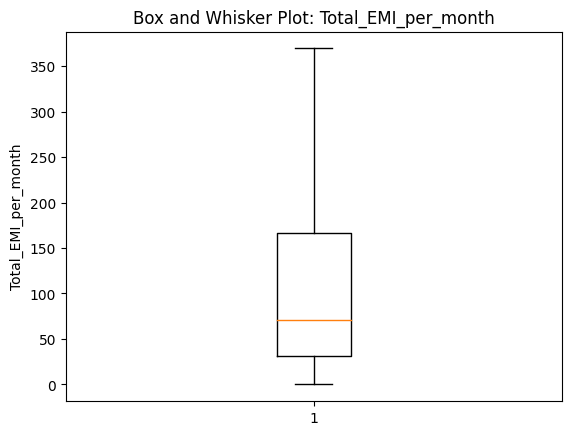

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Total_EMI_per_month')

Amount invested monthly

lower_bound :  -211.7381648706321
upper_bound :  541.0964040691679


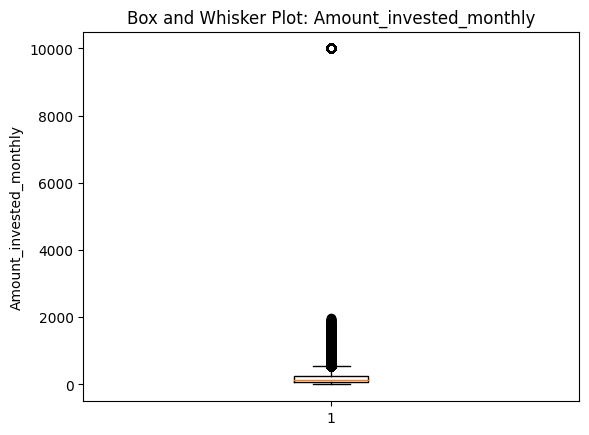

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
18            11708  34.0      143162.64           12187.220000   
19            11708  34.0      143162.64           12187.220000   
23            11708  34.0      143162.64           12187.220000   
28            47249  55.0       30689.89            2612.490833   
43            38382  31.0       73928.46            5988.705000   
...             ...   ...            ...                    ...   
149952        41043  39.0       87695.34            7337.945000   
149960         9812  38.0      139664.96           11777.746667   
149961         9812  38.0      139664.96           11777.746667   
149989        44897  50.0       37188.10            3097.008333   
149997        37932  25.0       39628.99            3359.415833   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
18                    1.0              5.0            8.0          3.0   
19                    1.0              5.0            8.0          3.0   
23                    1.0              5.0            8.0          3.0   
28                    2.0              5.0            4.0          1.0   
43                    4.0              5.0            8.0          0.0   
...                   ...              ...            ...          ...   
149952                2.0              7.0            7.0          0.0   
149960                3.0              6.0           12.0          4.0   
149961                3.0              6.0           12.0          4.0   
149989                1.0              4.0           38.0          3.0   
149997                4.0              6.0            7.0          2.0   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
18                      8.0                     7.0                 11.10   
19                      8.0                     5.0                  9.10   
23                      8.0                     6.0                  7.10   
28                      5.0                     6.0                 11.50   
43                      8.0                     7.0                 10.14   
...                     ...                     ...                   ...   
149952                 10.0                    10.0                  6.52   
149960                 14.0                    12.0                 12.39   
149961                 13.0                    12.0                 12.39   
149989                  7.0                    12.0                  5.38   
149997                 23.0                     5.0                 13.50   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
18                       3.0         2.0           1303.01   
19                       3.0         2.0           1303.01   
23                       3.0         2.0           1303.01   
28                       4.0         2.0            632.46   
43                       2.0         2.0            548.20   
...                      ...         ...               ...   
149952                   6.0         2.0            361.68   
149960                   9.0         1.0            365.66   
149961                   9.0         1.0            365.66   
149989                   3.0         2.0            620.64   
149997                   7.0         2.0            502.38   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
18                     26.519815               215.0                      0   
19                     39.501648               213.0                      0   
23                     38.374753               220.0                      0   
28                     41.154317               211.0                      0   
43                     30.201658               386.0                      0   
...                          ...                 ...                    ...   
149952                 37.329252               237.0                      0   
149960      

In [ ]:
outliers(df, 'Amount_invested_monthly')

lower_bound :  -211.7381648706321
upper_bound :  541.0964040691679


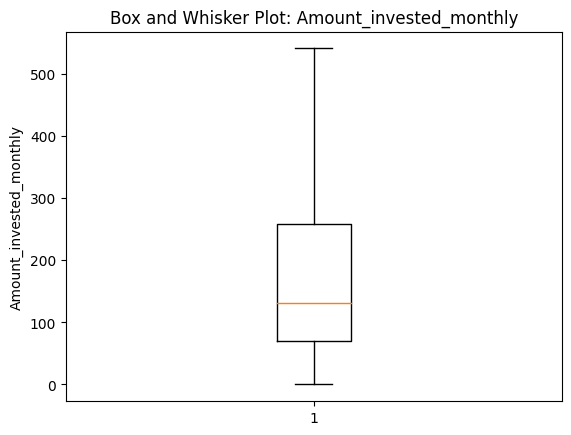

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Amount_invested_monthly')

Monthly Balance

lower_bound :  -31.157173782787595
upper_bound :  767.993955411031


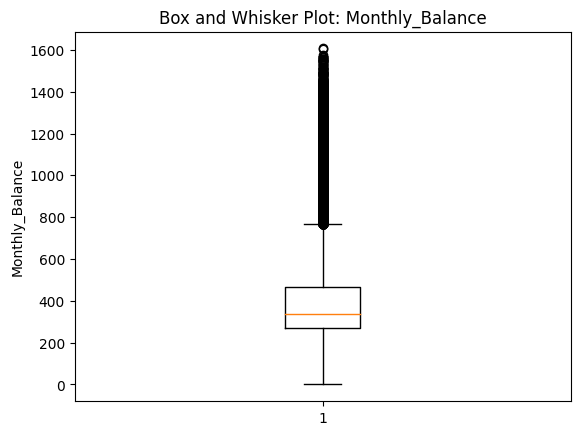

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
16            11708  34.0      143162.64           12187.220000   
17            11708  34.0      143162.64           12187.220000   
20            11708  34.0      143162.64           12187.220000   
21            11708  34.0      143162.64           12187.220000   
22            11708  34.0      143162.64           12187.220000   
...             ...   ...            ...                    ...   
149939        14421  28.0      118677.54            9963.795000   
149952        41043  39.0       87695.34            7337.945000   
149955        41043  40.0       87695.34            7337.945000   
149962         9812  38.0      139664.96           11777.746667   
149963         9812  38.0      139664.96           10699.849855   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
16                    1.0              5.0            8.0          3.0   
17                    1.0              5.0            8.0          3.0   
20                    1.0              5.0            8.0          3.0   
21                    1.0              5.0            8.0          9.5   
22                    1.0              5.0            8.0          3.0   
...                   ...              ...            ...          ...   
149939                4.0              4.0           38.0          4.0   
149952                2.0              7.0            7.0          0.0   
149955                2.0              7.0            7.0          0.0   
149962                3.0              6.0           12.0          4.0   
149963                3.0              6.0           12.0          4.0   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
16                      5.0                     8.0                  7.10   
17                     13.0                     6.0                  7.10   
20                     10.0                     5.0                  7.10   
21                      8.0                     6.0                  7.10   
22                      8.0                     6.0                  7.10   
...                     ...                     ...                   ...   
149939                  3.0                    10.0                  4.59   
149952                 10.0                    10.0                  6.52   
149955                  9.0                    13.0                  6.52   
149962                 14.0                    12.0                 13.39   
149963                 12.0                    12.0                 14.39   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
16                       3.0         2.0           1303.01   
17                       3.0         2.0           1303.01   
20                       3.0         2.0           1303.01   
21                       3.0         2.0           1303.01   
22                       3.0         2.0           1303.01   
...                      ...         ...               ...   
149939                   5.0         2.0            995.47   
149952                   6.0         2.0            361.68   
149955                  18.0         2.0            361.68   
149962                   9.0         1.0            365.66   
149963                   9.0         1.0            365.66   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
16                     28.616735               213.0                      0   
17                     41.702573               214.0                      0   
20                     31.376150               217.0                      0   
21                     39.783993               218.0                      0   
22                     38.068624               219.0                      0   
...                          ...                 ...                    ...   
149939                 32.107249               370.0                      0   
149952      

In [ ]:
outliers(df, 'Monthly_Balance')

lower_bound :  -31.157173782787595
upper_bound :  767.993955411031


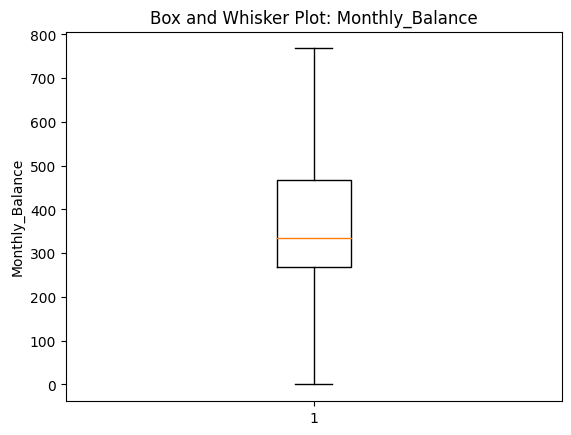

Empty DataFrame
Columns: [Customer_ID, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [ ]:
winsorize(df, 'Monthly_Balance')

## Exploratory Data Analysis

In [ ]:
#Dropping Customer_ID and Month which is not required anymore
df = df.drop(['Customer_ID'], axis=1)

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       150000 non-null  float64
 1   Annual_Income             150000 non-null  float64
 2   Monthly_Inhand_Salary     150000 non-null  float64
 3   Num_Bank_Accounts         150000 non-null  float64
 4   Num_Credit_Card           150000 non-null  float64
 5   Interest_Rate             150000 non-null  float64
 6   Num_of_Loan               150000 non-null  float64
 7   Delay_from_due_date       150000 non-null  float64
 8   Num_of_Delayed_Payment    150000 non-null  float64
 9   Changed_Credit_Limit      150000 non-null  float64
 10  Num_Credit_Inquiries      150000 non-null  float64
 11  Credit_Mix                150000 non-null  float64
 12  Outstanding_Debt          150000 non-null  float64
 13  Credit_Utilization_Ratio  150000 non-null  f

None

In [ ]:
numeric = df.select_dtypes(include=[np.number])
columns_with_negative_values = numeric.columns[numeric.lt(0).any()]

print(columns_with_negative_values)

Index([], dtype='object')


1. Age


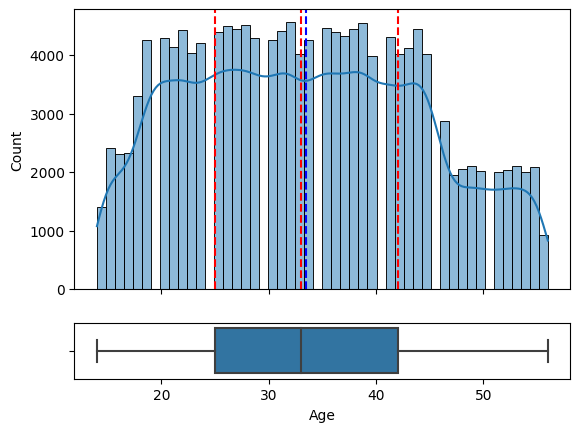

Column: Age

count    150000.000000
mean         33.479060
std          10.767158
min          14.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 24.53057019661278

Normality Test:
Data not normally distributed
--------------------------------------------------

2. Annual_Income


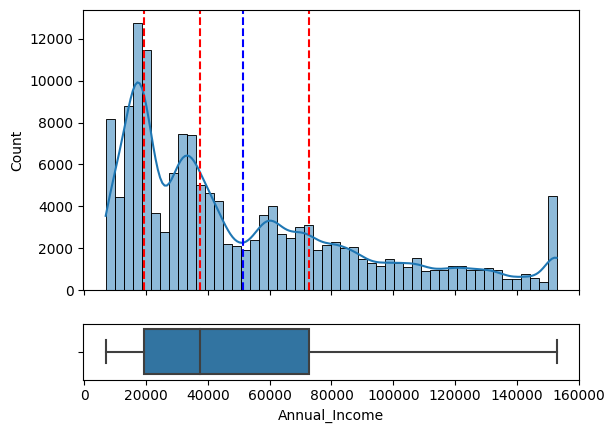

Column: Annual_Income

count    150000.000000
mean      51254.508006
std       38688.168913
min        7005.930000
25%       19455.490000
50%       37578.610000
75%       72796.905000
max      152809.027500
Name: Annual_Income, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 137.15119281144177

Normality Test:
Data not normally distributed
--------------------------------------------------

3. Monthly_Inhand_Salary


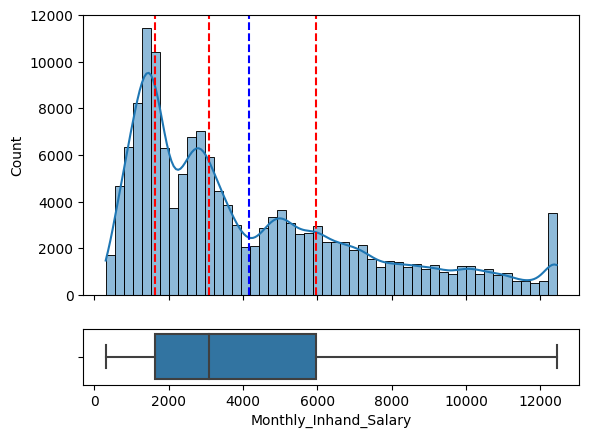

Column: Monthly_Inhand_Salary

count    150000.000000
mean       4165.135411
std        3103.028980
min         303.645417
25%        1625.558333
50%        3091.000000
75%        5951.373333
max       12440.095833
Name: Monthly_Inhand_Salary, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 134.6275638280284

Normality Test:
Data not normally distributed
--------------------------------------------------

4. Num_Bank_Accounts


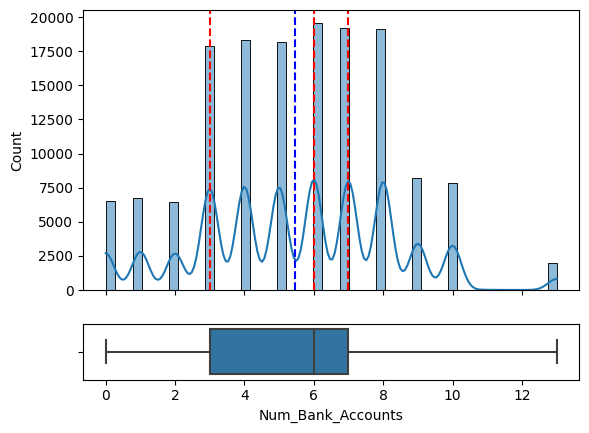

Column: Num_Bank_Accounts

count    150000.000000
mean          5.468507
std           2.716638
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max          13.000000
Name: Num_Bank_Accounts, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 2.564833023688371

Normality Test:
Data not normally distributed
--------------------------------------------------

5. Num_Credit_Card


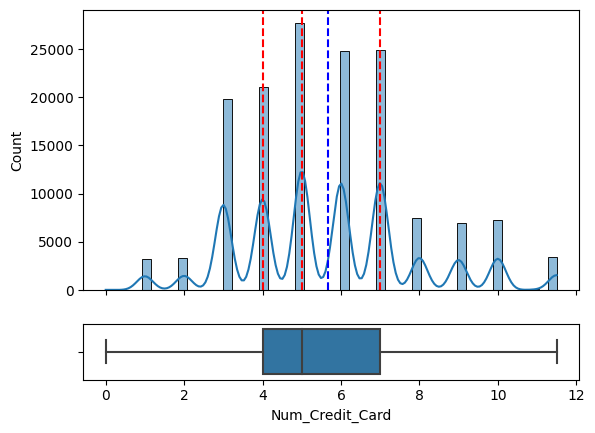

Column: Num_Credit_Card

count    150000.000000
mean          5.670333
std           2.232387
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.500000
Name: Num_Credit_Card, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 65.31109042794164

Normality Test:
Data not normally distributed
--------------------------------------------------

6. Interest_Rate


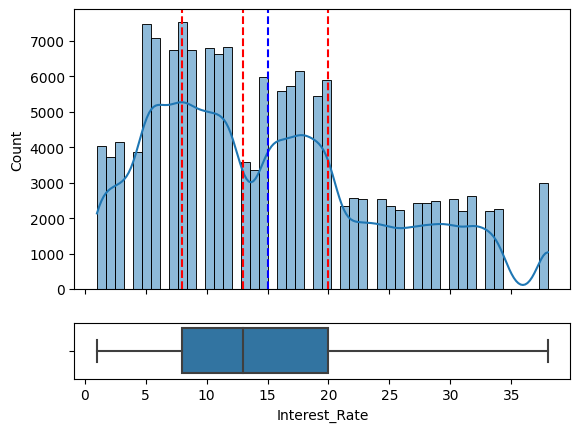

Column: Interest_Rate

count    150000.000000
mean         15.000953
std           9.255950
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max          38.000000
Name: Interest_Rate, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 85.8532562770112

Normality Test:
Data not normally distributed
--------------------------------------------------

7. Num_of_Loan


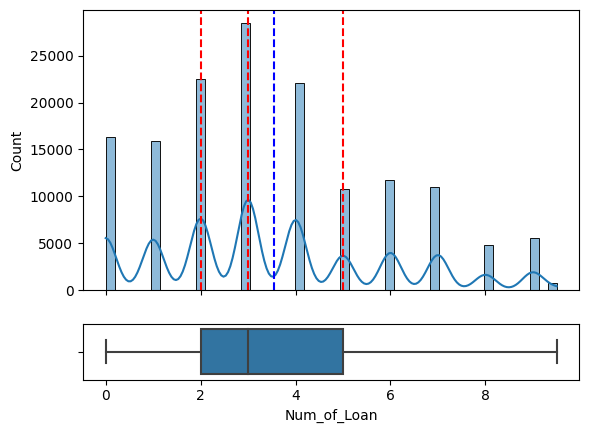

Column: Num_of_Loan

count    150000.000000
mean          3.542513
std           2.430858
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.500000
Name: Num_of_Loan, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 74.14632995131916

Normality Test:
Data not normally distributed
--------------------------------------------------

8. Delay_from_due_date


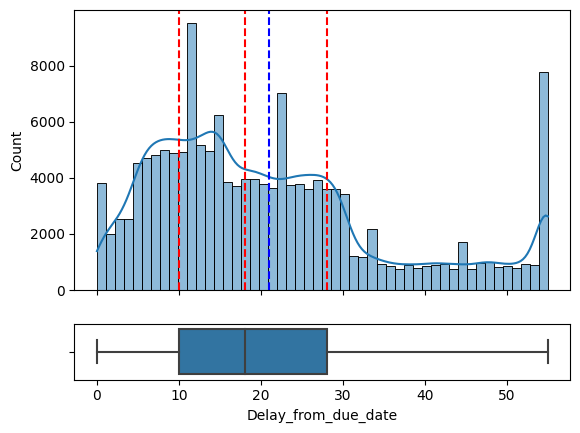

Column: Delay_from_due_date

count    150000.000000
mean         20.994187
std          14.324689
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          55.000000
Name: Delay_from_due_date, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 120.87895061866564

Normality Test:
Data not normally distributed
--------------------------------------------------

9. Num_of_Delayed_Payment


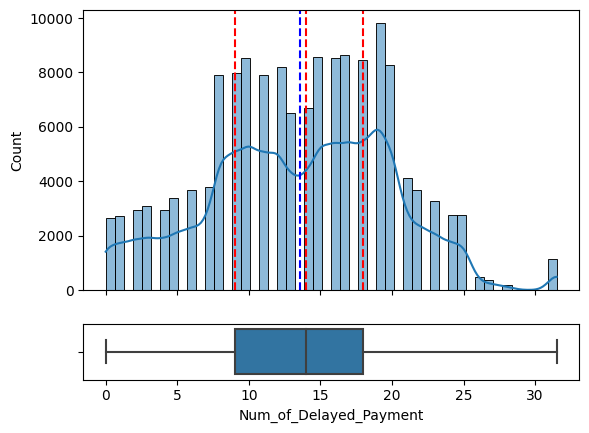

Column: Num_of_Delayed_Payment

count    150000.000000
mean         13.582377
std           6.374639
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          31.500000
Name: Num_of_Delayed_Payment, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: -11.079577160738596

Normality Test:
Data not normally distributed
--------------------------------------------------

10. Changed_Credit_Limit


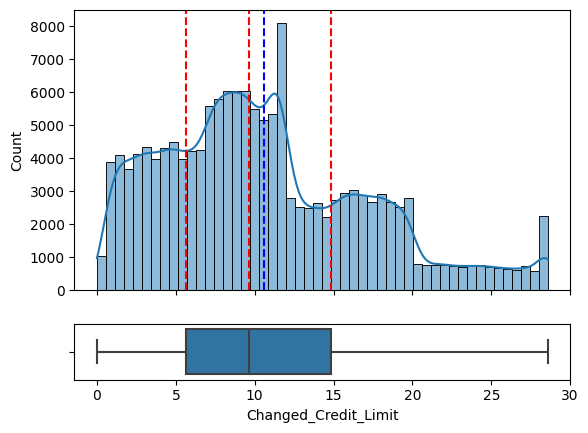

Column: Changed_Credit_Limit

count    150000.000000
mean         10.595906
std           6.535773
min           0.000000
25%           5.660000
50%           9.630000
75%          14.830000
max          28.585000
Name: Changed_Credit_Limit, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 98.3233275010809

Normality Test:
Data not normally distributed
--------------------------------------------------

11. Num_Credit_Inquiries


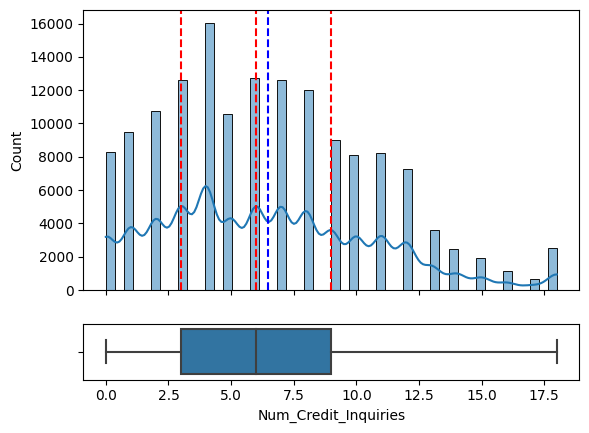

Column: Num_Credit_Inquiries

count    150000.000000
mean          6.475580
std           4.200667
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          18.000000
Name: Num_Credit_Inquiries, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 77.71420578785698

Normality Test:
Data not normally distributed
--------------------------------------------------

12. Credit_Mix


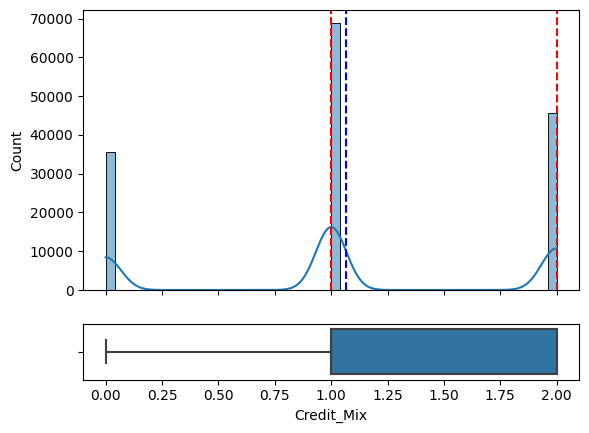

Column: Credit_Mix

count    150000.000000
mean          1.066160
std           0.732903
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: Credit_Mix, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: -16.3207572734291

Normality Test:
Data not normally distributed
--------------------------------------------------

13. Outstanding_Debt


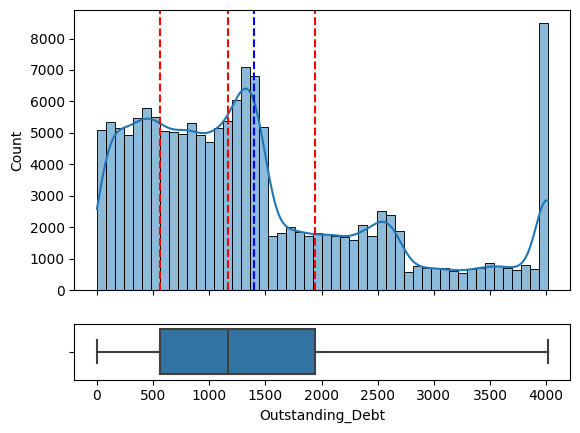

Column: Outstanding_Debt

count    150000.000000
mean       1399.859920
std        1086.191893
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4015.797500
Name: Outstanding_Debt, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 132.86378672907202

Normality Test:
Data not normally distributed
--------------------------------------------------

14. Credit_Utilization_Ratio


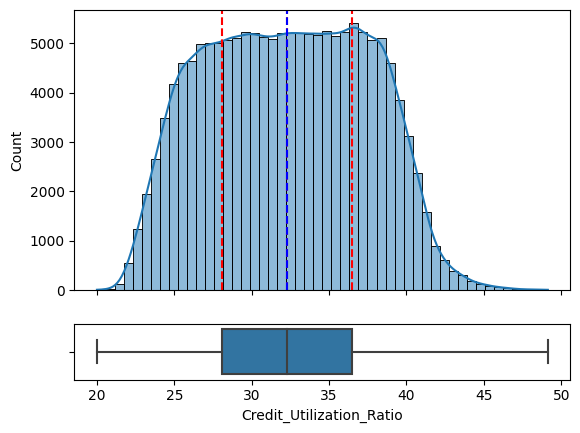

Column: Credit_Utilization_Ratio

count    150000.000000
mean         32.283297
std           5.113275
min          20.000000
25%          28.054731
50%          32.297058
75%          36.487954
max          49.137788
Name: Credit_Utilization_Ratio, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 4.984089482462068

Normality Test:
Data not normally distributed
--------------------------------------------------

15. Credit_History_Age


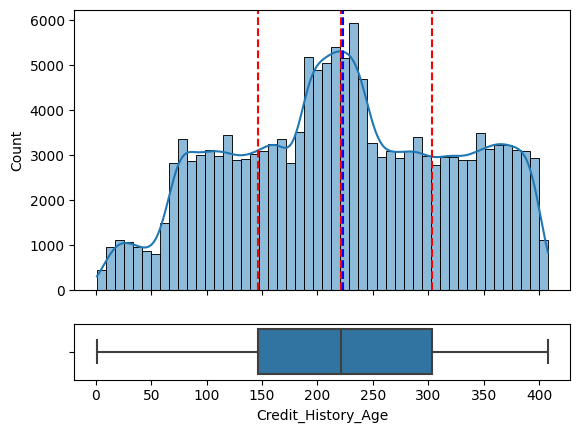

Column: Credit_History_Age

count    150000.000000
mean        222.728833
std          99.721456
min           1.000000
25%         146.000000
50%         221.000000
75%         303.000000
max         408.000000
Name: Credit_History_Age, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: -7.724040056418669

Normality Test:
Data not normally distributed
--------------------------------------------------

16. Payment_of_Min_Amount


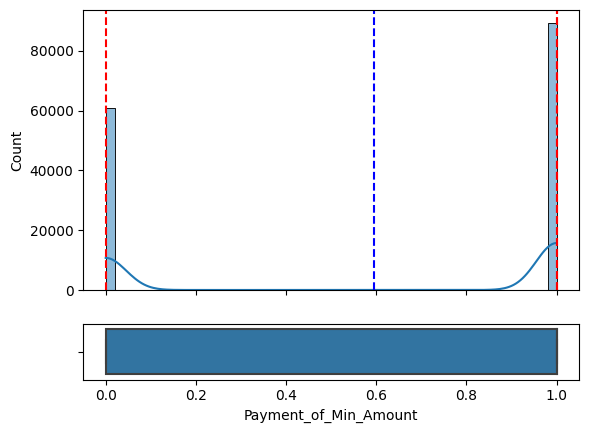

Column: Payment_of_Min_Amount

count    150000.000000
mean          0.594320
std           0.491025
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Payment_of_Min_Amount, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: -58.70335035684927

Normality Test:
Data not normally distributed
--------------------------------------------------

17. Total_EMI_per_month


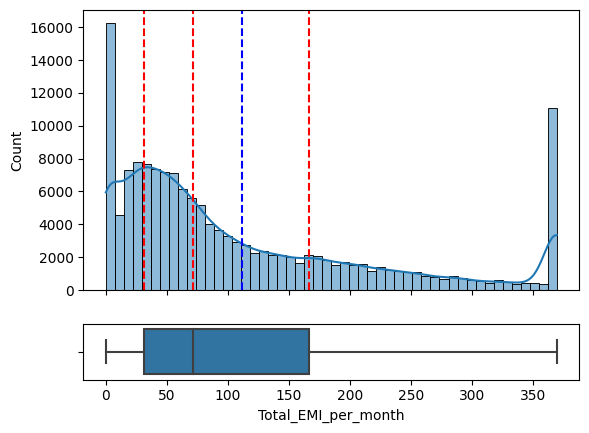

Column: Total_EMI_per_month

count    150000.000000
mean        111.785811
std         108.626589
min           0.000000
25%          30.947775
50%          71.280006
75%         166.279555
max         369.277226
Name: Total_EMI_per_month, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 147.0779199629063

Normality Test:
Data not normally distributed
--------------------------------------------------

18. Amount_invested_monthly


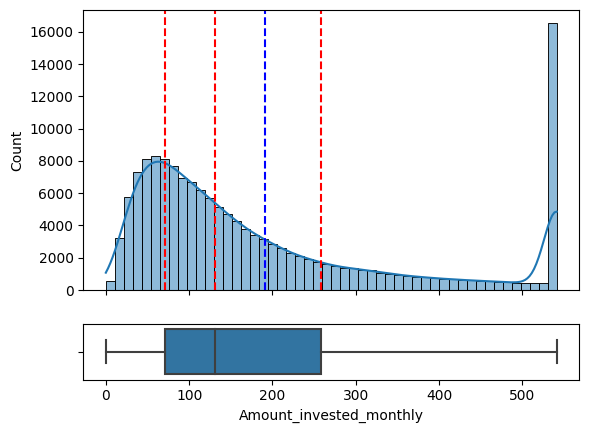

Column: Amount_invested_monthly

count    150000.000000
mean        191.569167
std         162.346152
min           0.000000
25%          70.574798
50%         130.548923
75%         258.783441
max         541.096404
Name: Amount_invested_monthly, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 144.45504803490928

Normality Test:
Data not normally distributed
--------------------------------------------------

19. Monthly_Balance


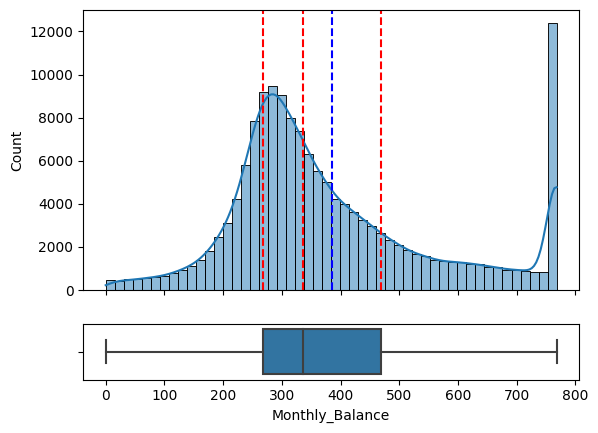

Column: Monthly_Balance

count    150000.000000
mean        385.548900
std         176.275439
min           0.007760
25%         268.524500
50%         335.209848
75%         468.312282
max         767.993955
Name: Monthly_Balance, dtype: float64

Outlier Detection:
No outliers detected

Skewness Test:
Data skewed with skewness: 112.06209953873822

Normality Test:
Data not normally distributed
--------------------------------------------------



In [ ]:
def plot(df, column):
    fig, ax = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1]})
    sns.histplot(data=df, x=column, kde=True, ax=ax[0], bins = 50)
    for percentile in [25, 50, 75]:
        ax[0].axvline(np.nanpercentile(df[column], percentile), c='red', linestyle='--')
    ax[0].axvline(np.mean(df[column]), c='blue', linestyle='--')

    sns.boxplot(data=df, x=column, ax=ax[1])
    ax[1].set_xlabel(column)
    plt.show()



def analyze_data(df):

    numerical_columns = df.select_dtypes(include=np.number).columns
    for i, column in enumerate(numerical_columns, 1):
        print(f'{i}. {column}')
        plot(df, column)

        print(f'Column: {column}\n')
        print(df[column].describe())
        print('')

        print('Outlier Detection:')
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr


        outliers= df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if outliers.empty:
            print('No outliers detected')
        else:
            print(f'{len(outliers)} outliers detected:')
            print(outliers)
        print('')

        print('Skewness Test:')
        sk, pval = st.skewtest(df[column])
        if pval < 0.05:
            print(f'Data skewed with skewness: {sk}')
        else:
            print(f'Data not skewed')
        print('')

        print('Normality Test:')
        norm, pval = st.normaltest(df[column])
        if pval < 0.05:
            print(f'Data not normally distributed')
        else:
            print(f'Data normally distributed')
        print('-' * 50)
        print('')

# Call the function to analyze the data
analyze_data(df)


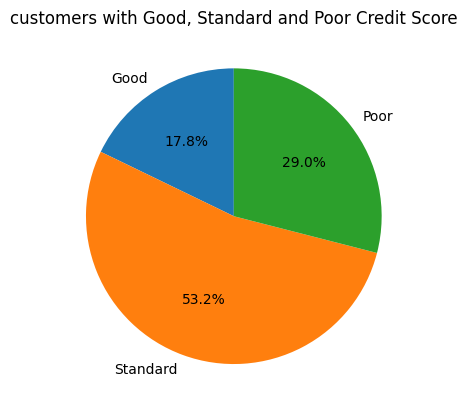

In [ ]:
data = [df[df['Credit_Score']=='Good']['Credit_Score'].count(),
        df[df['Credit_Score']=='Standard']['Credit_Score'].count(),
       df[df['Credit_Score']=='Poor']['Credit_Score'].count()]
category = ['Good','Standard','Poor']

plt.pie(data,
        labels=category,
        autopct='%1.1f%%',
        startangle=90)

plt.title('customers with Good, Standard and Poor Credit Score')

plt.show()


## Bivariate Analysis for numerical data

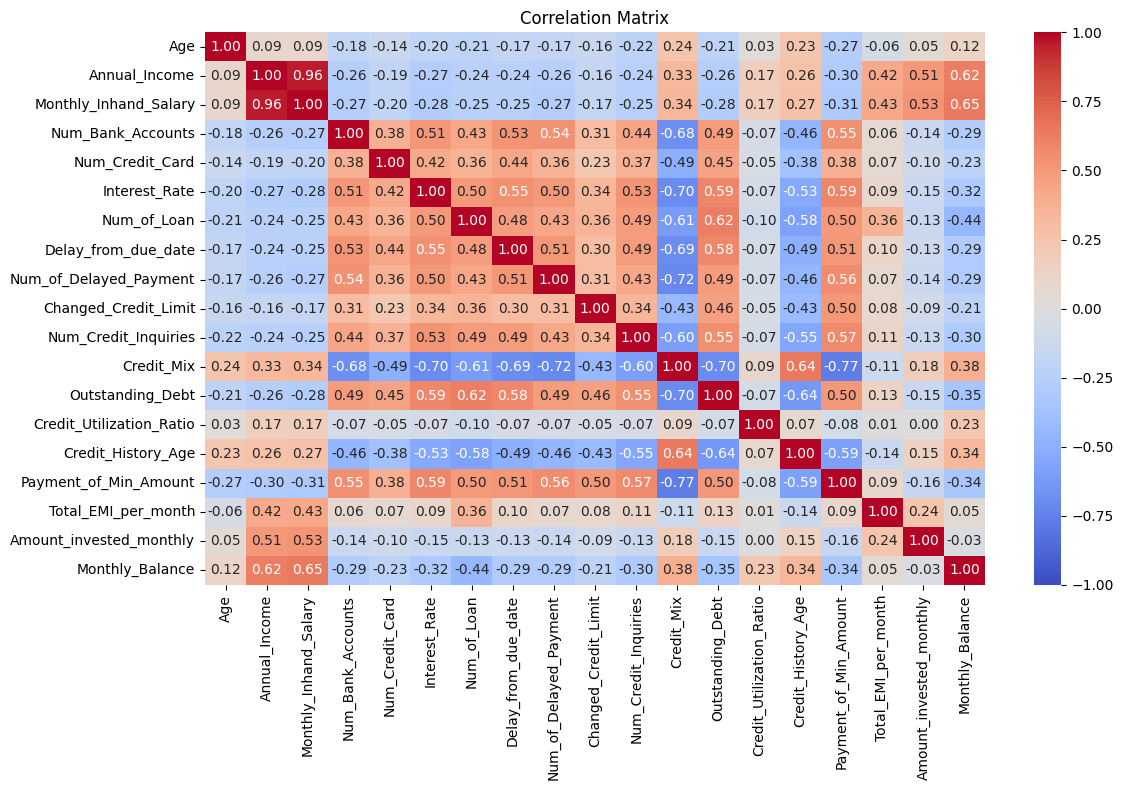

In [ ]:
# Select numerical columns for correlation plot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

# Display the plot
plt.tight_layout()
plt.show()

## Univariate Analysis of Categorical data

19. Payment_behaviour


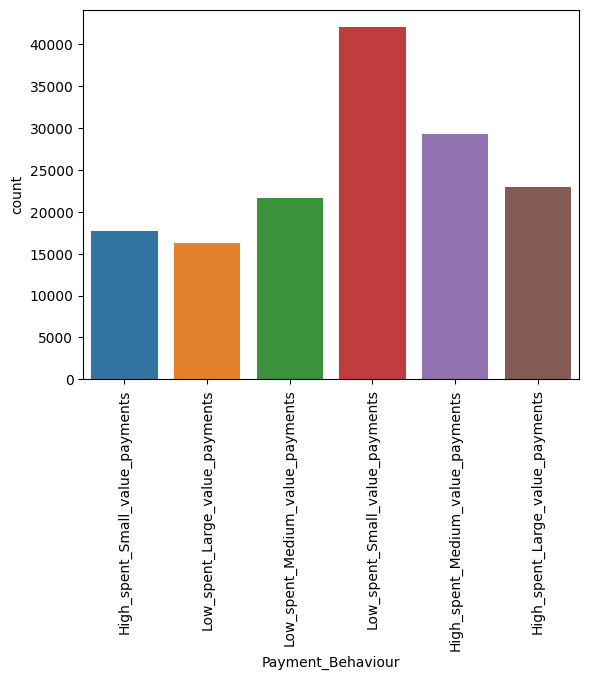

 
count                             150000
unique                                 6
top       Low_spent_Small_value_payments
freq                               42046
Name: Payment_Behaviour, dtype: object
unique value: ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']
------------------------------------------------------------------------------------------
 
21. Credit_score


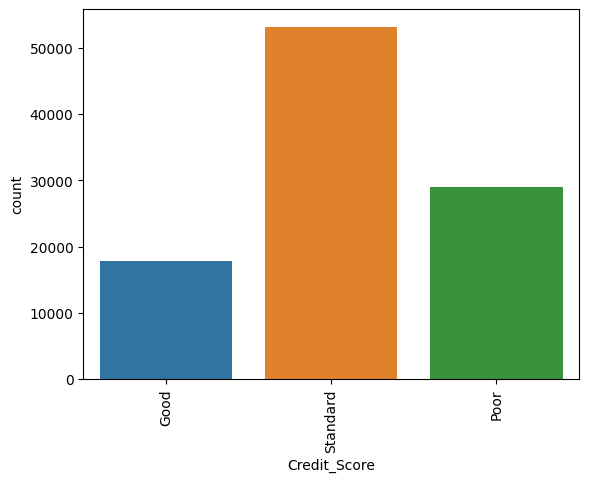

 
count       100000
unique           3
top       Standard
freq         53174
Name: Credit_Score, dtype: object
unique value: ['Good' 'Standard' 'Poor' nan]
------------------------------------------------------------------------------------------
 


In [ ]:
cat = []
for num, column in enumerate(df.columns, 1):
    if df[column].dtype == 'object':
        print(f'{num}. {column.capitalize()}')
        sns.countplot(data=df, x=column)
        plt.xticks(rotation=90)
        plt.show()
        cat.append(column)
        print(' ')
        print(df[column].describe())
        print(f'unique value: {df[column].unique()}')
        print('-' * 90)
        print(' ')

## Bivariate analysis for categorical

1. Credit_Score - Payment_Behaviour


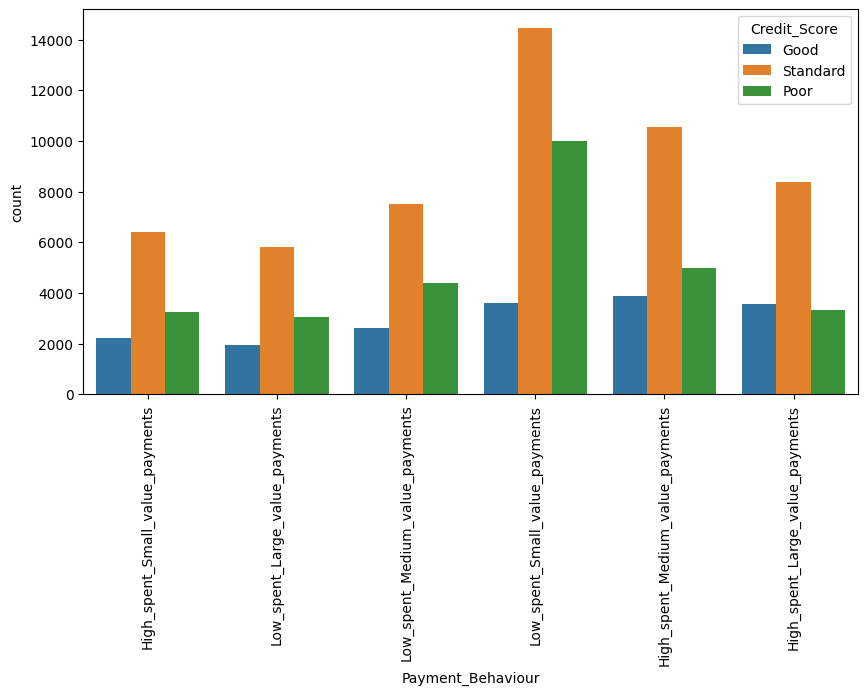

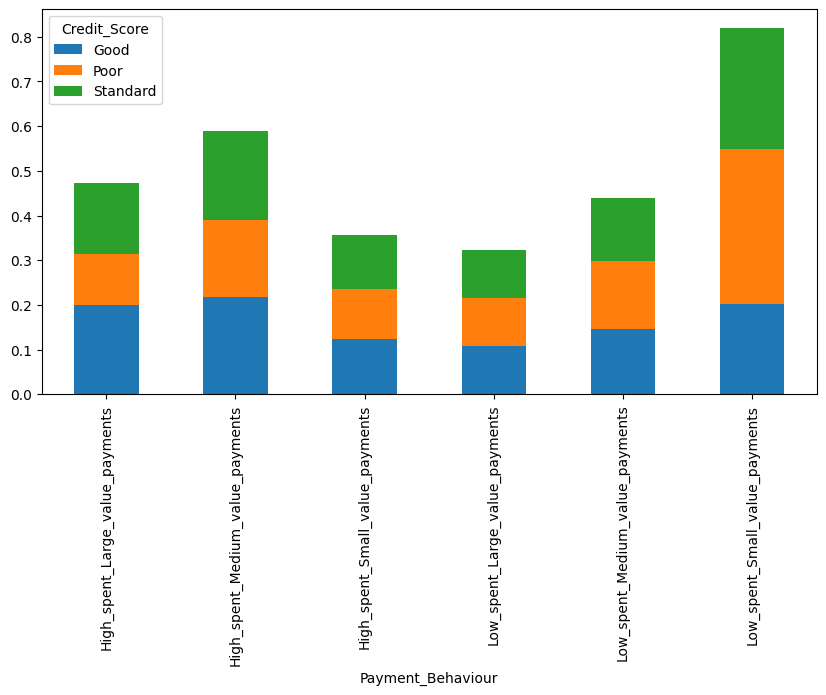

Credit_Score                      Good_total  Poor_total  Standard_total  \
Payment_Behaviour                                                          
High_spent_Large_value_payments         3562        3321            8396   
High_spent_Medium_value_payments        3882        4981           10554   
High_spent_Small_value_payments         2205        3234            6411   
Low_spent_Large_value_payments          1947        3052            5819   
Low_spent_Medium_value_payments         2620        4392            7521   
Low_spent_Small_value_payments          3612       10018           14473   

Credit_Score                      Good_percent  Poor_percent  Standard_percent  
Payment_Behaviour                                                               
High_spent_Large_value_payments           23.0          22.0              55.0  
High_spent_Medium_value_payments          20.0          26.0              54.0  
High_spent_Small_value_payments           19.0          27.0       

In [ ]:
for num, col in enumerate(cat, 1):
    if col != 'Credit_Score' and len(df[col].unique()) <= 16:
        print(f'{num}. Credit_Score - {col}')

        # Countplot
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, hue='Credit_Score')
        plt.xticks(rotation=90)
        plt.show()

        # Crosstab
        pd.crosstab(df[col], df['Credit_Score'], normalize='columns').plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.xticks(rotation=90)
        plt.show()

        # Calculate and print summary
        a = pd.crosstab(df[col], df['Credit_Score'])
        b = pd.crosstab(df[col], df['Credit_Score'], normalize='index')
        c = a.join(round(b, 2) * 100, lsuffix='_total', rsuffix='_percent')
        print(c)
        print('-' * 50)
        print('')

# Feature Engineering

In [ ]:
display_image(feat)

#### _Encoding Label_

_Credit_Score_

In [ ]:
#encode credit score
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
df['Credit_Score'] = df['Credit_Score'].map(m)

In [ ]:
df

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       23.0       19114.12            1824.843333                3.0   
1       23.0       19114.12            1824.843333                3.0   
2       23.0       19114.12            1824.843333                3.0   
3       23.0       19114.12            1824.843333                3.0   
4       23.0       19114.12            1824.843333                3.0   
...      ...            ...                    ...                ...   
149995  28.0       20002.88            1929.906667               10.0   
149996  25.0       39628.99            3359.415833                4.0   
149997  25.0       39628.99            3359.415833                4.0   
149998  25.0       39628.99            3359.415833                4.0   
149999  25.0       39628.99            3359.415833                4.0   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                   4.0            3.0          4.0                  3.0   
1                   4.0            3.0          4.0                 15.0   
2                   4.0            3.0          4.0                  3.0   
3                   4.0            3.0          4.0                  5.0   
4                   4.0            3.0          4.0                  6.0   
...                 ...            ...          ...                  ...   
149995              8.0           29.0          5.0                 33.0   
149996              6.0            7.0          2.0                 20.0   
149997              6.0            7.0          2.0                 23.0   
149998              6.0            7.0          2.0                 21.0   
149999              6.0            7.0          2.0                 22.0   

        Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                          7.0                 11.27                   4.0   
1                          4.0                 11.27                   4.0   
2                          7.0                 11.27                   4.0   
3                          4.0                  6.27                   4.0   
4                          4.0                 11.27                   4.0   
...                        ...                   ...                   ...   
149995                    25.0                 18.31                  12.0   
149996                     6.0                 11.50                   7.0   
149997                     5.0                 13.50                   7.0   
149998                     6.0                 11.50                   7.0   
149999                     5.0                 11.50                   7.0   

        Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0              2.0            809.98                 26.822620   
1              2.0            809.98                 31.944960   
2              2.0            809.98                 28.609352   
3              2.0            809.98                 31.377862   
4              2.0            809.98                 24.797347   
...            ...               ...                       ...   
149995         0.0           3571.70                 34.780553   
149996         2.0            502.38                 27.758522   
149997         2.0            502.38                 36.858542   
149998         2.0            502.38                 39.139840   
149999         2.0            502.38                 34.108530   

        Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                    265.0                      0            49.574949   
1                    265.0                      0            49.574949   
2                    267.0                      0            49.574949   
3                    268.0                      0            49.574949   
4                    269.0                      0            49.574949   
...                    ...                   

#### _Save train and test csv_

In [ ]:
# train check
df[df['Credit_Score'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [ ]:
# train save
df[df['Credit_Score'].notna()].to_csv("credit_train.csv", index=False)

In [ ]:
traindf = pd.read_csv('credit_train.csv')

In [ ]:
traindf

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                3.0   
1      23.0       19114.12            1824.843333                3.0   
2      23.0       19114.12            1824.843333                3.0   
3      23.0       19114.12            1824.843333                3.0   
4      23.0       19114.12            1824.843333                3.0   
...     ...            ...                    ...                ...   
99995  25.0       39628.99            3359.415833                4.0   
99996  25.0       39628.99            3359.415833                4.0   
99997  25.0       39628.99            3359.415833                4.0   
99998  25.0       39628.99            3359.415833                4.0   
99999  25.0       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  4.0            3.0          4.0                  3.0   
1                  4.0            3.0          4.0                 15.0   
2                  4.0            3.0          4.0                  3.0   
3                  4.0            3.0          4.0                  5.0   
4                  4.0            3.0          4.0                  6.0   
...                ...            ...          ...                  ...   
99995              6.0            7.0          2.0                 23.0   
99996              6.0            7.0          2.0                 18.0   
99997              6.0           38.0          2.0                 27.0   
99998              6.0            7.0          2.0                 20.0   
99999              6.0            7.0          2.0                 18.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                         7.0                 11.27                   4.0   
1                         4.0                 11.27                   4.0   
2                         7.0                 11.27                   4.0   
3                         4.0                  6.27                   4.0   
4                         4.0                 11.27                   4.0   
...                       ...                   ...                   ...   
99995                     7.0                 11.50                   3.0   
99996                     7.0                 11.50                   3.0   
99997                     6.0                 11.50                   3.0   
99998                     6.0                 11.50                   3.0   
99999                     6.0                 11.50                   3.0   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0             2.0            809.98                 26.822620   
1             2.0            809.98                 31.944960   
2             2.0            809.98                 28.609352   
3             2.0            809.98                 31.377862   
4             2.0            809.98                 24.797347   
...           ...               ...                       ...   
99995         2.0            502.38                 34.663572   
99996         2.0            502.38                 40.565631   
99997         2.0            502.38                 41.255522   
99998         2.0            502.38                 33.638208   
99999         2.0            502.38                 34.192463   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                   265.0                      0            49.574949   
1                   265.0                      0            49.574949   
2                   267.0                      0            49.574949   
3                   268.0                      0            49.574949   
4                   269.0                      0            49.574949   
...                   ...                    ...                  ...   
99995               378.0

In [ ]:
# test check
df[df['Credit_Score'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 100000 to 149999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  float64
 1   Annual_Income             50000 non-null  float64
 2   Monthly_Inhand_Salary     50000 non-null  float64
 3   Num_Bank_Accounts         50000 non-null  float64
 4   Num_Credit_Card           50000 non-null  float64
 5   Interest_Rate             50000 non-null  float64
 6   Num_of_Loan               50000 non-null  float64
 7   Delay_from_due_date       50000 non-null  float64
 8   Num_of_Delayed_Payment    50000 non-null  float64
 9   Changed_Credit_Limit      50000 non-null  float64
 10  Num_Credit_Inquiries      50000 non-null  float64
 11  Credit_Mix                50000 non-null  float64
 12  Outstanding_Debt          50000 non-null  float64
 13  Credit_Utilization_Ratio  50000 non-null  float64
 14  

In [ ]:
# test save
df[df['Credit_Score'].isna()].drop(columns='Credit_Score').to_csv("credit_test.csv", index=False)

In [ ]:
testdf = pd.read_csv('credit_test.csv')

In [ ]:
testdf

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                3.0   
1      24.0       19114.12            1824.843333                3.0   
2      24.0       19114.12            1824.843333                3.0   
3      24.0       19114.12            1824.843333                3.0   
4      28.0       34847.84            3037.986667                2.0   
...     ...            ...                    ...                ...   
49995  28.0       20002.88            1929.906667               10.0   
49996  25.0       39628.99            3359.415833                4.0   
49997  25.0       39628.99            3359.415833                4.0   
49998  25.0       39628.99            3359.415833                4.0   
49999  25.0       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  4.0            3.0          4.0                  3.0   
1                  4.0            3.0          4.0                  3.0   
2                  4.0            3.0          4.0                 15.0   
3                  4.0            3.0          4.0                  4.0   
4                  4.0            6.0          1.0                  3.0   
...                ...            ...          ...                  ...   
49995              8.0           29.0          5.0                 33.0   
49996              6.0            7.0          2.0                 20.0   
49997              6.0            7.0          2.0                 23.0   
49998              6.0            7.0          2.0                 21.0   
49999              6.0            7.0          2.0                 22.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                         7.0                 11.27                  18.0   
1                         9.0                 13.27                   4.0   
2                         4.0                 12.27                   4.0   
3                         5.0                 11.27                   4.0   
4                         1.0                  5.42                   5.0   
...                       ...                   ...                   ...   
49995                    25.0                 18.31                  12.0   
49996                     6.0                 11.50                   7.0   
49997                     5.0                 13.50                   7.0   
49998                     6.0                 11.50                   7.0   
49999                     5.0                 11.50                   7.0   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0             2.0            809.98                 35.030402   
1             2.0            809.98                 33.053114   
2             2.0            809.98                 33.811894   
3             2.0            809.98                 32.430559   
4             2.0            605.03                 25.926822   
...           ...               ...                       ...   
49995         0.0           3571.70                 34.780553   
49996         2.0            502.38                 27.758522   
49997         2.0            502.38                 36.858542   
49998         2.0            502.38                 39.139840   
49999         2.0            502.38                 34.108530   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                   273.0                      0            49.574949   
1                   274.0                      0            49.574949   
2                   265.0                      0            49.574949   
3                   276.0                      0            49.574949   
4                   327.0                      0            18.816215   
...                   ...                    ...                  ...   
49995                68.0

### _Train Test Split_

In [ ]:
X = traindf.drop('Credit_Score', axis=1)
y = traindf['Credit_Score']

X, y = resample(X,
                y,
                n_samples=100000,
                random_state=42,
                stratify=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.2)

print(f'shape X_train: {X_train.shape}')
print(f'shape X_test: {X_test.shape}')
print(f'shape y_train: {y_train.shape}')
print(f'shape y_test: {y_test.shape}')

shape X_train: (80000, 20)
shape X_test: (20000, 20)
shape y_train: (80000,)
shape y_test: (20000,)


### _Feature scaling and ecoding_

In [ ]:
X_train_enc = X_train.copy()
X_num = X_train_enc.select_dtypes('number').columns
X_cat = X_train_enc.select_dtypes('object').columns

#scaling numeric variables
ss = StandardScaler()
X_train_ss = pd.DataFrame(ss.fit_transform(X_train_enc[X_num]), columns=X_num)

#encoding categorical variables
X_train_ohe = pd.get_dummies(X_train_enc[X_cat], drop_first=True)

#combining tables
X_train_trans = pd.concat([X_train_ss, X_train_ohe.reset_index(drop=True)], axis=1)

In [ ]:
X_train_trans

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0     -0.123165       1.613880               1.763983           0.936671   
1     -1.331196      -1.021672              -0.971969           0.936671   
2      2.014122       0.549077               0.561740           0.198550   
3     -0.030239      -1.098414              -1.126016           0.936671   
4     -0.866569      -0.885536              -0.833049          -0.908632   
...         ...            ...                    ...                ...   
79995 -0.959494      -0.945713              -0.909530           0.567611   
79996 -0.587792       1.911272               1.939839          -0.170511   
79997 -0.123165       1.657857               1.805149          -1.646753   
79998  1.084867       0.288842               0.385716          -1.277693   
79999 -0.123165       0.049964               0.053524           0.567611   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0             0.593650      -0.759552     0.190746            -0.349028   
1            -0.750527      -0.867453    -0.631891             0.349389   
2             0.145591       0.535256    -1.454527             0.209706   
3            -0.302468       1.182660    -0.220572            -0.977603   
4            -0.302468       0.103653     0.190746            -0.698236   
...                ...            ...          ...                  ...   
79995         0.593650      -0.220049    -1.043209            -0.558553   
79996        -1.198585      -1.191155     0.190746            -0.768078   
79997        -1.198585      -1.406956     0.190746            -0.418870   
79998        -0.302468      -0.759552    -0.220572            -1.117287   
79999         0.145591       0.535256     2.452998            -0.279186   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                    0.220387              1.195098             -0.479808   
1                   -1.350451             -0.897245             -1.206598   
2                   -0.722116             -0.401971             -0.722072   
3                   -0.879200              0.643439              0.489245   
4                    0.220387              0.146641              0.489245   
...                       ...                   ...                   ...   
79995                0.534554             -0.034706             -0.722072   
79996               -1.978786             -0.709803             -0.479808   
79997               -1.036284             -0.891149             -0.479808   
79998               -1.193367             -0.275485             -0.237545   
79999                0.848722             -0.709803             -1.206598   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0       -0.088901         -0.475378                 -0.639690   
1       -0.088901         -0.469501                 -1.270354   
2       -0.088901         -1.001287                 -0.590976   
3       -0.088901          0.503033                 -0.133130   
4       -0.088901         -0.702503                  0.791384   
...           ...               ...                       ...   
79995   -0.088901         -0.430029                  0.245275   
79996    1.276962         -0.942473                  0.425711   
79997    1.276962         -1.244816                  0.824454   
79998    1.276962         -0.020279                  2.096159   
79999   -0.088901         -1.137187                  1.047899   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                0.152501               0.821289             2.288980   
1                0.904911              -1.217598            -0.883322   
2                0.122404               0.821289            -1.022749   
3               -0.579845               0.821289            -0.821657   
4               -1.211870               0.821289            -0.685860   
...                   ...                    ...      

In [ ]:
X_test_enc = X_test.copy()
X_num = X_test_enc.select_dtypes('number').columns
X_cat = X_test_enc.select_dtypes('object').columns

#scaling numeric variables
ss = StandardScaler()
X_test_ss = pd.DataFrame(ss.fit_transform(X_test_enc[X_num]), columns=X_num)

#encoding categorical variables
X_test_ohe = pd.get_dummies(X_test_enc[X_cat], drop_first=True)

#combining tables
X_test_trans = pd.concat([X_test_ss, X_test_ohe.reset_index(drop=True)], axis=1)

In [ ]:
X_test_trans

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0     -0.604165      -1.132048              -1.103917          -0.171852   
1      0.974029      -0.526425              -0.512547           0.196573   
2     -0.232825       2.598471               2.647245          -2.013979   
3      0.231349      -0.874993              -0.950791           0.564999   
4      0.881194      -0.189279              -0.166806           0.933424   
...         ...            ...                    ...                ...   
19995  0.231349      -0.381319              -0.287852          -0.171852   
19996 -1.346845      -0.283550              -0.218442          -1.645553   
19997  0.045679      -0.463622              -0.439418          -1.277128   
19998 -0.418495       2.007369               2.218399           0.933424   
19999 -0.325660      -0.179724              -0.209197          -0.171852   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0            -0.738814      -0.536150    -0.212822            -0.139228   
1             1.940960       0.109529     0.609837             2.236086   
2            -1.185443      -1.074215    -1.446810             0.070358   
3             0.601073      -0.213311    -0.212822            -1.047437   
4             0.154444       1.616111    -0.624151             1.188153   
...                ...            ...          ...                  ...   
19995        -1.185443      -1.074215    -0.624151             0.279945   
19996        -0.738814      -1.181828    -0.212822            -0.558401   
19997         0.154444      -0.536150    -1.035481            -1.396748   
19998         0.154444       2.477015    -1.035481            -0.837850   
19999         0.154444       0.324755     0.198508            -0.767988   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                   -0.872106              0.705892              0.736850   
1                    1.809125              2.048044              0.005824   
2                   -1.660704             -0.979850             -1.212554   
3                    0.547369             -0.993655             -0.481527   
4                    0.705089              0.211980              0.005824   
...                       ...                   ...                   ...   
19995                0.074211              0.666011              1.224201   
19996               -0.872106             -0.923096             -0.968878   
19997               -1.818423             -0.436854             -0.481527   
19998               -0.872106              0.064727             -1.212554   
19999               -1.345265              1.413014              0.980526   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0       -0.100438         -0.142944                 -0.766923   
1       -1.465083          2.339121                 -1.213446   
2        1.264207         -0.942274                  1.701029   
3       -0.100438         -0.963639                  0.047192   
4       -0.100438         -0.103462                  1.441711   
...           ...               ...                       ...   
19995   -0.100438         -0.386844                  0.171288   
19996    1.264207         -1.223028                 -0.349886   
19997    1.264207         -0.115676                  1.394701   
19998   -0.100438         -0.958785                  0.138773   
19999   -0.100438         -0.225742                 -0.859697   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                0.035507               0.826485             2.457536   
1               -1.042108               0.826485            -0.021998   
2                0.684072              -1.209944            -1.020904   
3                0.763895              -1.209944            -0.667256   
4               -0.732793               0.826485            -0.403205   
...                   ...                    ...      

In [ ]:
# Preprocessing the test.csv dataset in the same way

# Scaling numeric variables
num_test = testdf.select_dtypes('number').columns
test_ss = pd.DataFrame(ss.transform(testdf[num_test]), columns=num_test)

# Encoding categorical variables
cat_test = testdf.select_dtypes('object').columns
test_ohe = pd.get_dummies(testdf[cat_test], drop_first=True)

# Combine the preprocessed numeric and one-hot encoded categorical tables
test_trans_unseen = pd.concat([test_ss, test_ohe.reset_index(drop=True)], axis=1)

In [ ]:
test_trans_unseen

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0     -0.975505      -0.836199              -0.761695          -0.908703   
1     -0.882670      -0.836199              -0.761695          -0.908703   
2     -0.882670      -0.836199              -0.761695          -0.908703   
3     -0.882670      -0.836199              -0.761695          -0.908703   
4     -0.511330      -0.431994              -0.372111          -1.277128   
...         ...            ...                    ...                ...   
49995 -0.511330      -0.813367              -0.727955           1.670275   
49996 -0.789835      -0.309165              -0.268888          -0.540277   
49997 -0.789835      -0.309165              -0.268888          -0.540277   
49998 -0.789835      -0.309165              -0.268888          -0.540277   
49999 -0.789835      -0.309165              -0.268888          -0.540277   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0            -0.738814      -1.289441     0.198508            -1.257023   
1            -0.738814      -1.289441     0.198508            -1.257023   
2            -0.738814      -1.289441     0.198508            -0.418677   
3            -0.738814      -1.289441     0.198508            -1.187161   
4            -0.738814      -0.966602    -1.035481            -1.257023   
...                ...            ...          ...                  ...   
49995         1.047702       1.508498     0.609837             0.838842   
49996         0.154444      -0.858989    -0.624151            -0.069366   
49997         0.154444      -0.858989    -0.624151             0.140220   
49998         0.154444      -0.858989    -0.624151             0.000496   
49999         0.154444      -0.858989    -0.624151             0.070358   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                   -1.029826              0.106142              2.929930   
1                   -0.714387              0.412920             -0.481527   
2                   -1.502984              0.259531             -0.481527   
3                   -1.345265              0.106142             -0.481527   
4                   -1.976143             -0.791182             -0.237852   
...                       ...                   ...                   ...   
49995                1.809125              1.185999              1.467877   
49996               -1.187545              0.141422              0.249499   
49997               -1.345265              0.448199              0.249499   
49998               -1.187545              0.141422              0.249499   
49999               -1.345265              0.141422              0.249499   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0        1.264207         -0.540085                  0.532576   
1        1.264207         -0.540085                  0.145097   
2        1.264207         -0.540085                  0.293791   
3        1.264207         -0.540085                  0.023098   
4        1.264207         -0.730302                 -1.251406   
...           ...               ...                       ...   
49995   -1.465083          2.023107                  0.483614   
49996    1.264207         -0.825573                 -0.892457   
49997    1.264207         -0.825573                  0.890827   
49998    1.264207         -0.825573                  1.337881   
49999    1.264207         -0.825573                  0.351921   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                0.514447              -1.209944            -0.553928   
1                0.524425              -1.209944            -0.553928   
2                0.434624              -1.209944            -0.553928   
3                0.544381              -1.209944            -0.553928   
4                1.053255              -1.209944            -0.843663   
...                   ...                    ...      

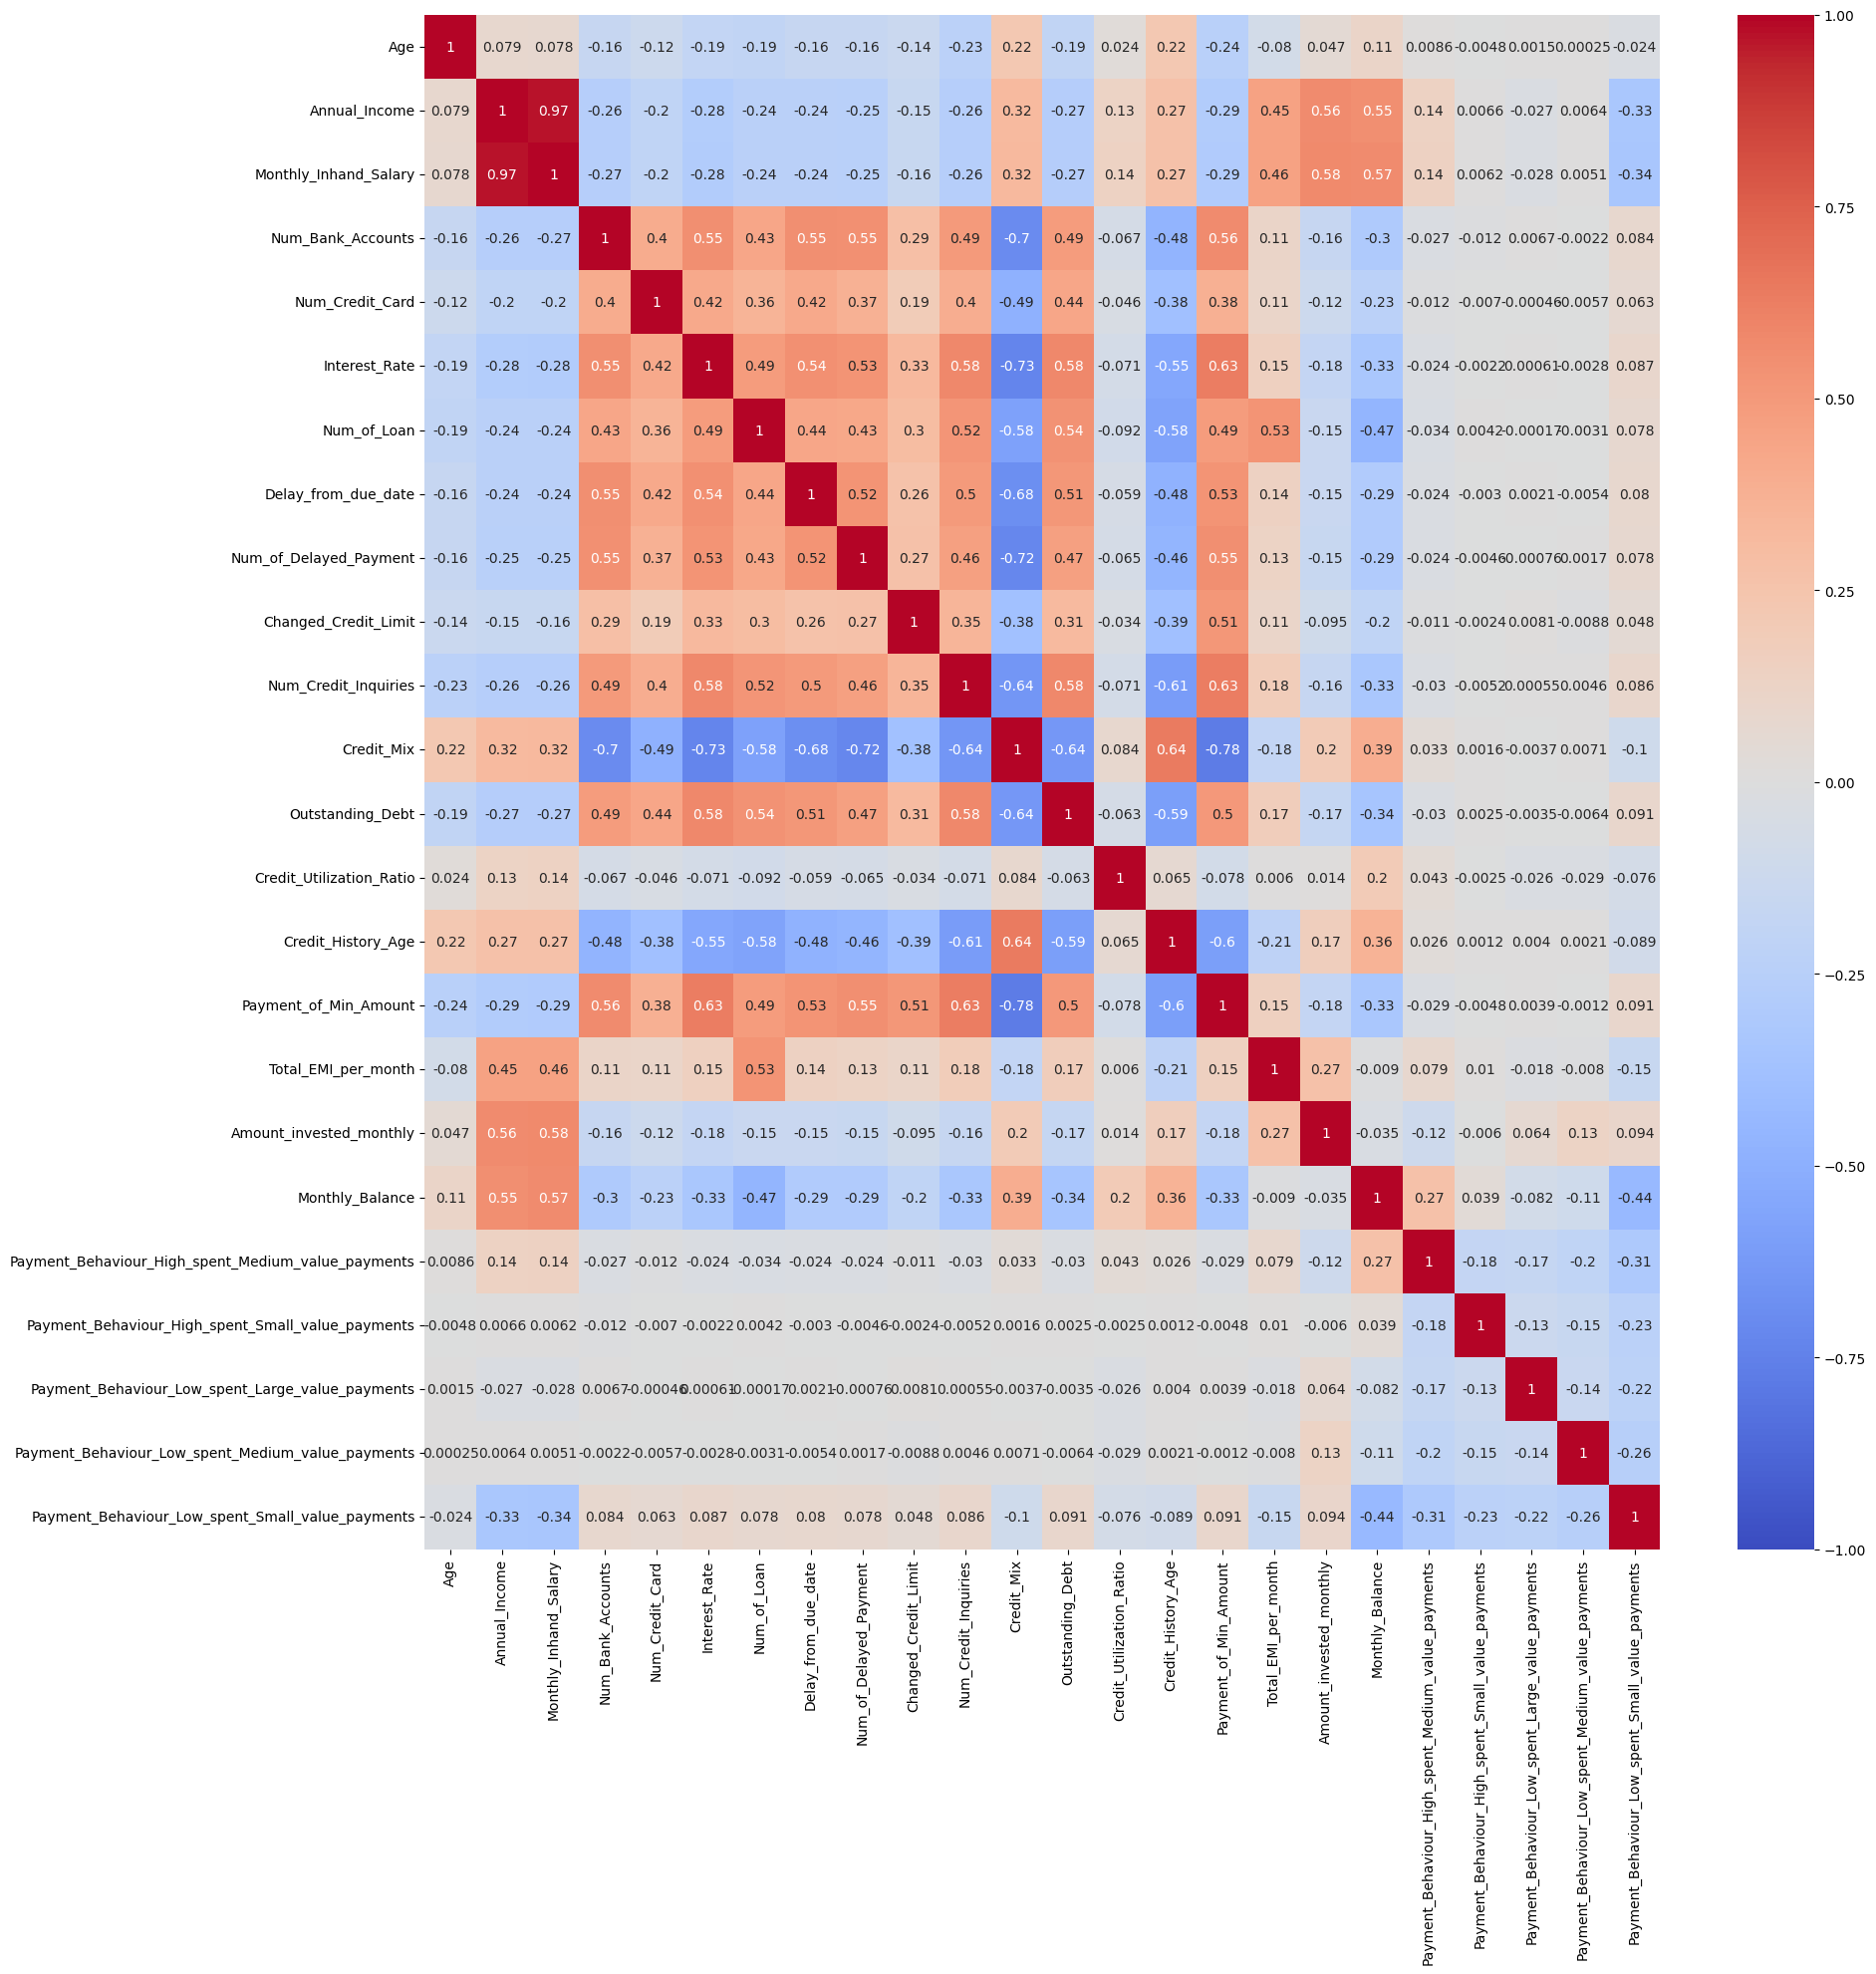

In [ ]:
plt.figure(figsize=(20,20))
corr = X_train_trans.corr(method='spearman')
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

### _Feature Selection_

In [ ]:
drop2 = [] #stores highly correlated features

columns_for_plot = X_train_trans.columns

for col1, col2 in combinations(columns_for_plot, 2):
    pear, pval1 = st.pearsonr(X_train_trans[col1], X_train_trans[col2])
    if (pear > 0.8) or (pear < -0.8):
        drop2.append(col1)

In [ ]:
drop2

['Annual_Income']

In [ ]:
X_train_trans.drop(drop2,axis=1,inplace=True)
X_test_trans.drop(drop2,axis=1,inplace=True)
test_trans_unseen.drop(drop2,axis=1,inplace=True)

In [ ]:
mi_col = pd.DataFrame({'col': X_train_trans.columns,
                       'mi':mutual_info_classif(X_train_trans, y_train, random_state=42)}) \
                        .sort_values('mi')
mi_col

col        mi
21  Payment_Behaviour_Low_spent_Medium_value_payments  0.000000
20   Payment_Behaviour_Low_spent_Large_value_payments  0.000415
18  Payment_Behaviour_High_spent_Medium_value_paym...  0.002660
19  Payment_Behaviour_High_spent_Small_value_payments  0.005519
22   Payment_Behaviour_Low_spent_Small_value_payments  0.006714
0                                                 Age  0.023788
7                              Num_of_Delayed_Payment  0.084665
5                                         Num_of_Loan  0.086891
2                                   Num_Bank_Accounts  0.103577
13                                 Credit_History_Age  0.103798
3                                     Num_Credit_Card  0.108747
9                                Num_Credit_Inquiries  0.115967
8                                Changed_Credit_Limit  0.121021
14                              Payment_of_Min_Amount  0.121333
6                                 Delay_from_due_date  0.123416
4                                       Interest_Rate  0.168323
16                            Amount_invested_monthly  0.171614
12                           Credit_Utilization_Ratio  0.183339
10                                         Credit_Mix  0.183989
17                                    Monthly_Balance  0.195530
15                                Total_EMI_per_month  0.520581
11                                   Outstanding_Debt  0.598770
1                               Monthly_Inhand_Salary  0.615156

In [ ]:
sel = mi_col[mi_col['mi'] > 0.01]
X_train_trans = X_train_trans[sel['col']]

In [ ]:
X_train_trans

Age  Num_of_Delayed_Payment  Num_of_Loan  Num_Bank_Accounts  \
0     -0.123165                0.220387     0.190746           0.936671   
1     -1.331196               -1.350451    -0.631891           0.936671   
2      2.014122               -0.722116    -1.454527           0.198550   
3     -0.030239               -0.879200    -0.220572           0.936671   
4     -0.866569                0.220387     0.190746          -0.908632   
...         ...                     ...          ...                ...   
79995 -0.959494                0.534554    -1.043209           0.567611   
79996 -0.587792               -1.978786     0.190746          -0.170511   
79997 -0.123165               -1.036284     0.190746          -1.646753   
79998  1.084867               -1.193367    -0.220572          -1.277693   
79999 -0.123165                0.848722     2.452998           0.567611   

       Credit_History_Age  Num_Credit_Card  Num_Credit_Inquiries  \
0                0.152501         0.593650             -0.479808   
1                0.904911        -0.750527             -1.206598   
2                0.122404         0.145591             -0.722072   
3               -0.579845        -0.302468              0.489245   
4               -1.211870        -0.302468              0.489245   
...                   ...              ...                   ...   
79995            0.112372         0.593650             -0.722072   
79996            1.246004        -1.198585             -0.479808   
79997            0.132437        -1.198585             -0.479808   
79998            0.473529        -0.302468             -0.237545   
79999            1.125618         0.145591             -1.206598   

       Changed_Credit_Limit  Payment_of_Min_Amount  Delay_from_due_date  \
0                  1.195098               0.821289            -0.349028   
1                 -0.897245              -1.217598             0.349389   
2                 -0.401971               0.821289             0.209706   
3                  0.643439               0.821289            -0.977603   
4                  0.146641               0.821289            -0.698236   
...                     ...                    ...                  ...   
79995             -0.034706              -1.217598            -0.558553   
79996             -0.709803              -1.217598            -0.768078   
79997             -0.891149              -1.217598            -0.418870   
79998             -0.275485              -1.217598            -1.117287   
79999             -0.709803               0.821289            -0.279186   

       Interest_Rate  Amount_invested_monthly  Credit_Utilization_Ratio  \
0          -0.759552                -0.029592                 -0.639690   
1          -0.867453                -0.523856                 -1.270354   
2           0.535256                -0.672977                 -0.590976   
3           1.182660                -0.978185                 -0.133130   
4           0.103653                -0.494497                  0.791384   
...              ...                      ...                       ...   
79995      -0.220049                 2.142506                  0.245275   
79996      -1.191155                 0.113914                  0.425711   
79997      -1.406956                 2.142506                  0.824454   
79998      -0.759552                -0.937638                  2.096159   
79999       0.535256                 0.868346                  1.047899   

       Credit_Mix  Monthly_Balance  Total_EMI_per_month  Outstanding_Debt  \
0       -0.088901         1.568424             2.288980         -0.475378   
1       -0.088901        -0.624063            -0.883322         -0.469501   
2       -0.088901         2.112937            -1.022749         -1.001287   
3       -0.088901        -0.569000            -0.821657          0.503033   
4       -0.088901        -0.422615            -0.685860         -0.702503   
...           ...             

In [ ]:
X_test_trans = X_test_trans[sel['col']]
X_test_trans

Age  Num_of_Delayed_Payment  Num_of_Loan  Num_Bank_Accounts  \
0     -0.604165               -0.872106    -0.212822          -0.171852   
1      0.974029                1.809125     0.609837           0.196573   
2     -0.232825               -1.660704    -1.446810          -2.013979   
3      0.231349                0.547369    -0.212822           0.564999   
4      0.881194                0.705089    -0.624151           0.933424   
...         ...                     ...          ...                ...   
19995  0.231349                0.074211    -0.624151          -0.171852   
19996 -1.346845               -0.872106    -0.212822          -1.645553   
19997  0.045679               -1.818423    -1.035481          -1.277128   
19998 -0.418495               -0.872106    -1.035481           0.933424   
19999 -0.325660               -1.345265     0.198508          -0.171852   

       Credit_History_Age  Num_Credit_Card  Num_Credit_Inquiries  \
0                0.035507        -0.738814              0.736850   
1               -1.042108         1.940960              0.005824   
2                0.684072        -1.185443             -1.212554   
3                0.763895         0.601073             -0.481527   
4               -0.732793         0.154444              0.005824   
...                   ...              ...                   ...   
19995           -0.074250        -1.185443              1.224201   
19996           -0.154074        -0.738814             -0.968878   
19997            1.392504         0.154444             -0.481527   
19998            0.694050         0.154444             -1.212554   
19999            0.075419         0.154444              0.980526   

       Changed_Credit_Limit  Payment_of_Min_Amount  Delay_from_due_date  \
0                  0.705892               0.826485            -0.139228   
1                  2.048044               0.826485             2.236086   
2                 -0.979850              -1.209944             0.070358   
3                 -0.993655              -1.209944            -1.047437   
4                  0.211980               0.826485             1.188153   
...                     ...                    ...                  ...   
19995              0.666011               0.826485             0.279945   
19996             -0.923096              -1.209944            -0.558401   
19997             -0.436854              -1.209944            -1.396748   
19998              0.064727              -1.209944            -0.837850   
19999              1.413014               0.826485            -0.767988   

       Interest_Rate  Amount_invested_monthly  Credit_Utilization_Ratio  \
0          -0.536150                -0.990149                 -0.766923   
1           0.109529                -0.739922                 -1.213446   
2          -1.074215                 0.145713                  1.701029   
3          -0.213311                -0.580294                  0.047192   
4           1.616111                -1.035116                  1.441711   
...              ...                      ...                       ...   
19995      -1.074215                -0.706387                  0.171288   
19996      -1.181828                -0.561955                 -0.349886   
19997      -0.536150                 0.433703                  1.394701   
19998       2.477015                 1.176089                  0.138773   
19999       0.324755                -0.357900                 -0.859697   

       Credit_Mix  Monthly_Balance  Total_EMI_per_month  Outstanding_Debt  \
0       -0.100438        -0.373822             2.457536         -0.142944   
1       -1.465083        -0.310091            -0.021998          2.339121   
2        1.264207         2.169841            -1.020904         -0.942274   
3       -0.100438        -0.616805            -0.667256         -0.963639   
4       -0.100438         0.748054            -0.403205         -0.103462   
...           ...             

In [ ]:
test_trans_unseen = test_trans_unseen[sel['col']]

## Modelling

logreg_def = LogisticRegression(random_state=42)
rf_def = RandomForestClassifier(random_state=42)
tree_def = DecisionTreeClassifier(random_state=42)
knn_def = KNeighborsClassifier()

model_vot = []

model_vot.append(('lr', logreg_def))
model_vot.append(('dt', tree_def))
vot_clas = VotingClassifier(model_vot, voting='soft')

model_lvl2 = logreg_def
stack_cla = StackingClassifier(model_vot, model_lvl2)

model = [logreg_def, rf_def, tree_def, knn_def, vot_clas, stack_cla]
model_list = ['logreg_def', 'rf_def', 'tree_def', 'knn_def', 'vot_clas', 'stack_cla']

In [ ]:
def confusion_matrix_df(cm):
    cm_array = np.array(cm)
    df_cm = pd.DataFrame(cm_array,columns=['Predict Poor','Predict Standard','Predict Good'])
    df_cm.rename(index={0:'Actual Poor',1:'Actual Standard',2:'Actual Good'})
    return df_cm

In [ ]:
models ={}

### Logistic Regression

In [ ]:
lg = LogisticRegression(max_iter=10000)

In [ ]:
lg.fit(X_train_trans,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
log_score = lg.score(X_train_trans,y_train)

In [ ]:
Y_pred  = lg.predict(X_test_trans)

In [ ]:
cm = confusion_matrix(y_pred=Y_pred,y_true=y_test)

In [ ]:
cm_array = np.array(cm)
cm_array

array([[2952, 2358,  489],
       [1476, 7759, 1400],
       [  72, 1173, 2321]], dtype=int64)

In [ ]:
df_cm = pd.DataFrame(cm_array,columns=['Predict Poor','Predict Standard','Predict Good'])
df_cm.rename(index={0:'Actual Poor',1:'Actual Standard',2:'Actual Good'})

Predict Poor  Predict Standard  Predict Good
Actual Poor              5271               499            29
Actual Standard           623              9630           382
Actual Good                12               432          3122

In [ ]:
precision = round(precision_score(y_test,Y_pred, average = 'weighted')*100,2)
print(f'Accuracy of Logistic Model: {accuracy_score(y_pred=Y_pred,y_true=y_test)*100:.2f}%')
print(f'precision of Logistic Model: {precision}%')

Accuracy of Logistic Model: 65.16%
precision of Logistic Model: 65.39%


In [ ]:
Logistic_reg_accuracy = round(accuracy_score(y_pred=Y_pred,y_true=y_test)*100,2)

In [ ]:
models['Logistic Reggression']=[Logistic_reg_accuracy,precision]

## KNN

In [ ]:
def evaluate_knn_model(k, X_train_trans, y_train, X_test_trans, y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_trans, y_train)
    y_pred = knn.predict(X_test_trans)

    cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
    cm_array = np.array(cm)
    df_cm = pd.DataFrame(cm_array,columns=['Predict Poor','Predict Standard','Predict Good'])
    df_cm = df_cm.rename(index={0:'Actual Poor',1:'Actual Standard',2:'Actual Good'})

    precision = round(precision_score(y_test, y_pred, average='weighted') * 100, 2)
    accuracy = round(accuracy_score(y_pred=y_pred, y_true=y_test) * 100, 2)

    print(f"Confusion Matrix for KNN Model (k={k}):\n{df_cm}")
    print('')
    print(f"Accuracy of KNN Model (k={k}): {accuracy}%")
    print('')
    print(f"Precision of KNN Model (k={k}): {precision}%")
    print('')
    print('')

    return accuracy, precision


k_values = [15, 6, 2, 1]

for k in k_values:
    accuracy, precision = evaluate_knn_model(k, X_train_trans, y_train, X_test_trans, y_test)
    models[f"KNN {k}"] = [accuracy, precision]


Confusion Matrix for KNN Model (k=15):
                 Predict Good  Predict Poor  Predict Standard
Actual Poor              4006          1432               361
Actual Standard          1341          8295               999
Actual Good               139          1191              2236

Accuracy of KNN Model (k=15): 72.68%

Precision of KNN Model (k=15): 72.66%


Confusion Matrix for KNN Model (k=6):
                 Predict Good  Predict Poor  Predict Standard
Actual Poor              4591           979               229
Actual Standard          1629          8304               702
Actual Good               230          1234              2102

Accuracy of KNN Model (k=6): 74.98%

Precision of KNN Model (k=6): 74.98%


Confusion Matrix for KNN Model (k=2):
                 Predict Good  Predict Poor  Predict Standard
Actual Poor              5223           522                54
Actual Standard          1578          8689               368
Actual Good               236          1163    

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=1000,max_features = X_train_trans.shape[1],random_state=42)

In [ ]:
dt.fit(X_train_trans,y_train)

DecisionTreeClassifier(max_depth=1000, max_features=18, random_state=42)

In [ ]:
y_pred = dt.predict(X_test_trans)

In [ ]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)
cm_array = np.array(cm)
df_cm = pd.DataFrame(cm_array,columns=['Predict Poor','Predict Standard','Predict Poor'])
df_cm = df_cm.rename(index={0:'Actual Poor',1:'Actual Standard',2:'Actual Good'})

In [ ]:
confusion_matrix_df(cm)

Predict Poor  Predict Standard  Predict Good
0          5271               499            29
1           623              9630           382
2            12               432          3122

In [ ]:
Decision_tree_precision = round(precision_score(y_test,y_pred, average = 'weighted')*100,2)
Decision_tree_score = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
print(f'Accuracy of DT Model: {Decision_tree_score}%')
print(f'precision of DT Model: {Decision_tree_precision}%')

Accuracy of DT Model: 83.7%
precision of DT Model: 83.76%


In [ ]:
models['Decision_tree'] = [Decision_tree_score,Decision_tree_precision]

## Random Forest

In [ ]:
n_estimators_values = [25, 50, 75, 100]
for n_estimators in n_estimators_values:
    rand = RandomForestClassifier(n_estimators=n_estimators, random_state=42, max_features=X_train_trans.shape[1], max_depth=1000)
    rand.fit(X_train_trans, y_train)
    y_pred = rand.predict(X_test_trans)

    cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
    cm_array = np.array(cm)
    df_cm = pd.DataFrame(cm_array, columns=['Predict Poor', 'Predict Standard', 'Predict Good'])
    df_cm.rename(index={0: 'Actual Poor', 1: 'Actual Standard', 2: 'Actual Good'})

    precision = round(precision_score(y_test, y_pred, average='weighted') * 100, 2)
    accuracy = round(accuracy_score(y_pred=y_pred, y_true=y_test) * 100, 2)

    print(f"Confusion Matrix for Random Forest Model (n_estimators={n_estimators}):\n{df_cm}")
    print('')
    print(f"Accuracy of Random Forest Model (n_estimators={n_estimators}): {accuracy}%")
    print('')
    print(f"Precision of Random Forest Model (n_estimators={n_estimators}): {precision}%")
    print('')
    print('')

    models[f"Random Forest {n_estimators}"] = [accuracy, precision]


Confusion Matrix for Random Forest Model (n_estimators=25):
   Predict Good  Predict Poor  Predict Standard
0          5242           526                31
1           630          9605               400
2            23           476              3067

Accuracy of Random Forest Model (n_estimators=25): 89.57%

Precision of Random Forest Model (n_estimators=25): 89.57%


Confusion Matrix for Random Forest Model (n_estimators=50):
   Predict Good  Predict Poor  Predict Standard
0          5274           495                30
1           613          9624               398
2            16           459              3091

Accuracy of Random Forest Model (n_estimators=50): 89.94%

Precision of Random Forest Model (n_estimators=50): 89.95%


Confusion Matrix for Random Forest Model (n_estimators=75):
   Predict Good  Predict Poor  Predict Standard
0          5269           501                29
1           609          9628               398
2            13           439              3114

A

## Summary

In [ ]:
models

{'Random Forest 25': [89.57, 89.57],
 'Random Forest 50': [89.94, 89.95],
 'KNN 15': [72.68, 72.66],
 'KNN 6': [74.98, 74.98],
 'KNN 2': [80.4, 80.98],
 'KNN 1': [86.38, 86.39],
 'Decision_tree': [83.7, 83.76],
 'Random Forest 75': [90.06, 90.06],
 'Random Forest 100': [90.12, 90.12],
 'Logistic Reggression': [65.16, 90.12]}

In [ ]:
models_df = pd.DataFrame(models)

In [ ]:
models_df.rename(index={0:'Accuracy',1:'Precision'})

Random Forest 25  Random Forest 50  KNN 15  KNN 6  KNN 2  KNN 1  \
Accuracy              89.57             89.94   72.68  74.98  80.40  86.38   
Precision             89.57             89.95   72.66  74.98  80.98  86.39   

           Decision_tree  Random Forest 75  Random Forest 100  \
Accuracy           83.70             90.06              90.12   
Precision          83.76             90.06              90.12   

           Logistic Reggression  
Accuracy                  65.16  
Precision                 90.12

## Testing on unseen data

In [ ]:
test_trans_unseen

Age  Num_of_Delayed_Payment  Num_of_Loan  Num_Bank_Accounts  \
0     -0.975505               -1.029826     0.198508          -0.908703   
1     -0.882670               -0.714387     0.198508          -0.908703   
2     -0.882670               -1.502984     0.198508          -0.908703   
3     -0.882670               -1.345265     0.198508          -0.908703   
4     -0.511330               -1.976143    -1.035481          -1.277128   
...         ...                     ...          ...                ...   
49995 -0.511330                1.809125     0.609837           1.670275   
49996 -0.789835               -1.187545    -0.624151          -0.540277   
49997 -0.789835               -1.345265    -0.624151          -0.540277   
49998 -0.789835               -1.187545    -0.624151          -0.540277   
49999 -0.789835               -1.345265    -0.624151          -0.540277   

       Credit_History_Age  Num_Credit_Card  Num_Credit_Inquiries  \
0                0.514447        -0.738814              2.929930   
1                0.524425        -0.738814             -0.481527   
2                0.434624        -0.738814             -0.481527   
3                0.544381        -0.738814             -0.481527   
4                1.053255        -0.738814             -0.237852   
...                   ...              ...                   ...   
49995           -1.531026         1.047702              1.467877   
49996            1.612018         0.154444              0.249499   
49997            1.621996         0.154444              0.249499   
49998            1.631974         0.154444              0.249499   
49999            1.641952         0.154444              0.249499   

       Changed_Credit_Limit  Payment_of_Min_Amount  Delay_from_due_date  \
0                  0.106142              -1.209944            -1.257023   
1                  0.412920              -1.209944            -1.257023   
2                  0.259531              -1.209944            -0.418677   
3                  0.106142              -1.209944            -1.187161   
4                 -0.791182              -1.209944            -1.257023   
...                     ...                    ...                  ...   
49995              1.185999               0.826485             0.838842   
49996              0.141422              -1.209944            -0.069366   
49997              0.448199              -1.209944             0.140220   
49998              0.141422              -1.209944             0.000496   
49999              0.141422              -1.209944             0.070358   

       Interest_Rate  Amount_invested_monthly  Credit_Utilization_Ratio  \
0          -1.289441                 0.266722                  0.532576   
1          -1.289441                -1.053244                  0.145097   
2          -1.289441                -0.275606                  0.293791   
3          -1.289441                -0.945175                  0.023098   
4          -0.966602                -0.941485                 -1.251406   
...              ...                      ...                       ...   
49995       1.508498                -0.286326                  0.483614   
49996      -0.858989                -0.071891                 -0.892457   
49997      -0.858989                 2.134337                  0.890827   
49998      -0.858989                -0.586219                  1.337881   
49999      -0.858989                 0.167439                  0.351921   

       Credit_Mix  Monthly_Balance  Total_EMI_per_month  Outstanding_Debt  \
0        1.264207        -1.135077            -0.553928         -0.540085   
1        1.264207        -0.139857            -0.553928         -0.540085   
2        1.264207        -0.689620            -0.553928         -0.540085   
3        1.264207        -0.239944            -0.553928         -0.540085   
4        1.264207         0.563787            -0.843663         -0.730302   
...           ...             

In [ ]:
predicted = rand.predict(test_trans_unseen)

In [ ]:
predicted = pd.DataFrame(predicted, columns = ['Credit_Score_Predicted'])

In [ ]:
predicted

Credit_Score_Predicted
0                         2.0
1                         2.0
2                         2.0
3                         2.0
4                         2.0
...                       ...
49995                     1.0
49996                     1.0
49997                     0.0
49998                     1.0
49999                     0.0

[50000 rows x 1 columns]

### Feature Importance

In [ ]:
fi = pd.DataFrame(rand.feature_importances_,
                  index=rand.feature_names_in_,
                  columns=['importance']).sort_values(['importance'], ascending=False)
fi

importance
Outstanding_Debt            0.177974
Credit_Mix                  0.125549
Credit_History_Age          0.070303
Changed_Credit_Limit        0.067404
Interest_Rate               0.062756
Credit_Utilization_Ratio    0.061826
Amount_invested_monthly     0.052759
Monthly_Balance             0.052133
Monthly_Inhand_Salary       0.051136
Delay_from_due_date         0.049384
Age                         0.044864
Total_EMI_per_month         0.043673
Num_of_Delayed_Payment      0.039727
Num_Credit_Card             0.031469
Num_Credit_Inquiries        0.028815
Num_Bank_Accounts           0.023301
Num_of_Loan                 0.016095
Payment_of_Min_Amount       0.000833

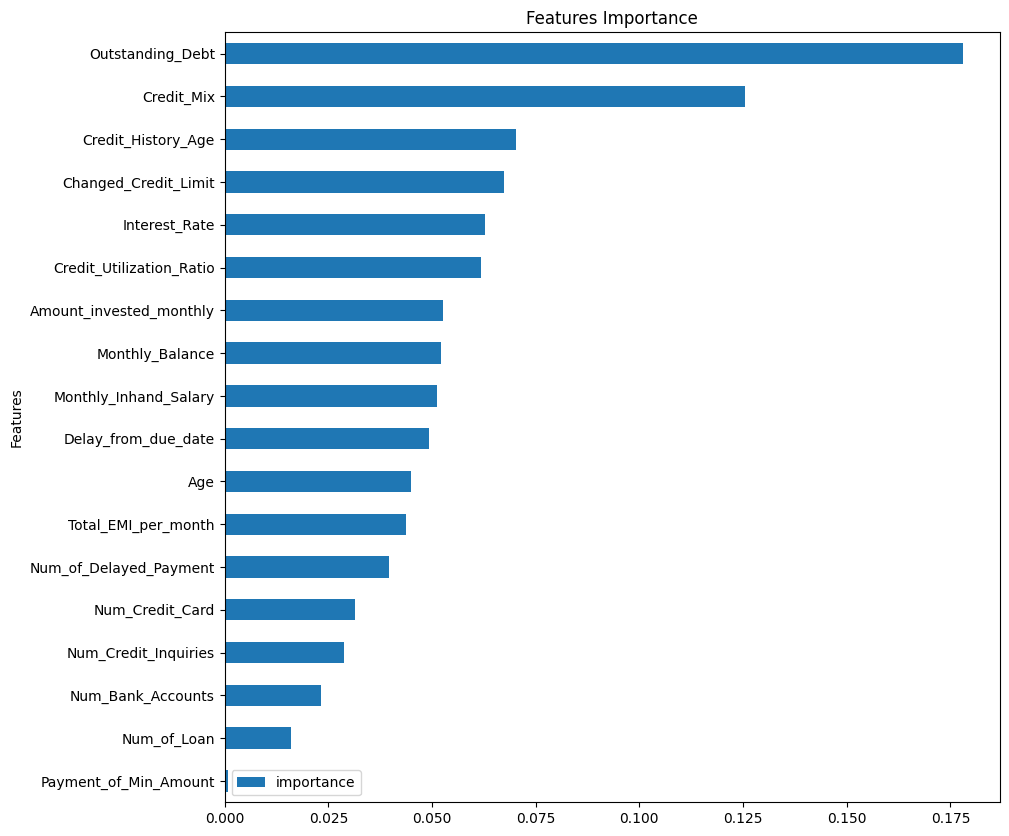

In [ ]:
ax = fi.sort_values('importance').plot(kind='barh', title='Features Importance', figsize=(10,10))
ax.set_ylabel('Features')
plt.show()